In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = np.genfromtxt("./boston.csv", dtype=np.float32, delimiter=",", names=True)

In [5]:
data

array([(6.32000e-03,  18. ,  2.31, 0., 0.538 , 6.575,  65.2,  4.09  ,  1., 296., 15.3, 3.9690e+02,  4.98, 24. ),
       (2.73100e-02,   0. ,  7.07, 0., 0.469 , 6.421,  78.9,  4.9671,  2., 242., 17.8, 3.9690e+02,  9.14, 21.6),
       (2.72900e-02,   0. ,  7.07, 0., 0.469 , 7.185,  61.1,  4.9671,  2., 242., 17.8, 3.9283e+02,  4.03, 34.7),
       (3.23700e-02,   0. ,  2.18, 0., 0.458 , 6.998,  45.8,  6.0622,  3., 222., 18.7, 3.9463e+02,  2.94, 33.4),
       (6.90500e-02,   0. ,  2.18, 0., 0.458 , 7.147,  54.2,  6.0622,  3., 222., 18.7, 3.9690e+02,  5.33, 36.2),
       (2.98500e-02,   0. ,  2.18, 0., 0.458 , 6.43 ,  58.7,  6.0622,  3., 222., 18.7, 3.9412e+02,  5.21, 28.7),
       (8.82900e-02,  12.5,  7.87, 0., 0.524 , 6.012,  66.6,  5.5605,  5., 311., 15.2, 3.9560e+02, 12.43, 22.9),
       (1.44550e-01,  12.5,  7.87, 0., 0.524 , 6.172,  96.1,  5.9505,  5., 311., 15.2, 3.9690e+02, 19.15, 27.1),
       (2.11240e-01,  12.5,  7.87, 0., 0.524 , 5.631, 100. ,  6.0821,  5., 311., 15.2, 3.8663e+0

In [6]:
x1 = np.array([i[0] for i in data])
x2 = np.array([i[1] for i in data])
x3 = np.array([i[2] for i in data])
x4 = np.array([i[3] for i in data])
x5 = np.array([i[4] for i in data])
x6 = np.array([i[5] for i in data])
x7 = np.array([i[6] for i in data])
x8 = np.array([i[7] for i in data])
x9 = np.array([i[8] for i in data])
x10 = np.array([i[9] for i in data])
x11 = np.array([i[10] for i in data])
x12 = np.array([i[11] for i in data])
x13 = np.array([i[12] for i in data])
y = np.array([i[13] for i in data])

In [7]:
x1 = (x1 - x1.mean())/np.std(x1)

In [9]:
x2 = (x2 - x2.mean())/np.std(x2)
x3 = (x3 - x3.mean())/np.std(x3)
x4 = (x4 - x4.mean())/np.std(x4)
x5 = (x5 - x5.mean())/np.std(x5)
x6 = (x6 - x6.mean())/np.std(x6)
x7 = (x7 - x7.mean())/np.std(x7)
x8 = (x8 - x8.mean())/np.std(x8)
x9 = (x9 - x9.mean())/np.std(x9)
x10 = (x10 - x10.mean())/np.std(x10)
x11 = (x11 - x11.mean())/np.std(x11)
x12 = (x12 - x12.mean())/np.std(x12)
x13 = (x13 - x13.mean())/np.std(x13)
y = (y - y.mean())/np.std(y)

# Generate 5-fold sample indices for dataset

In [10]:
m = len(data)
np.random.seed(6754)

In [11]:
full_range = np.array([i for i in range(m)])
validation_choose_set = [i for i in range(m)]

In [12]:
validation_sample1 = np.random.choice(validation_choose_set, size=int(m/5))
validation_choose_set = np.setdiff1d(validation_choose_set, validation_sample1)
validation_sample2 = np.random.choice(validation_choose_set, size=int(m/5))
validation_choose_set = np.setdiff1d(validation_choose_set, validation_sample2)
validation_sample3 = np.random.choice(validation_choose_set, size=int(m/5))
validation_choose_set = np.setdiff1d(validation_choose_set, validation_sample3)
validation_sample4 = np.random.choice(validation_choose_set, size=int(m/5))
validation_choose_set = np.setdiff1d(validation_choose_set, validation_sample4)

In [13]:
validation_sample5 = validation_choose_set[:]
validation_sample5

array([  0,   1,   3,   4,   5,   6,  10,  11,  16,  21,  31,  33,  34,
        40,  41,  43,  46,  48,  49,  52,  53,  54,  55,  56,  58,  59,
        60,  63,  65,  67,  68,  71,  72,  78,  79,  83,  84,  90,  95,
        97,  99, 102, 106, 107, 108, 115, 117, 119, 120, 129, 131, 133,
       135, 136, 138, 139, 143, 145, 146, 151, 157, 158, 159, 165, 170,
       174, 175, 180, 186, 187, 190, 194, 196, 202, 210, 211, 212, 219,
       220, 222, 232, 234, 238, 241, 248, 253, 256, 260, 261, 270, 272,
       274, 276, 278, 282, 283, 287, 290, 291, 296, 297, 298, 301, 308,
       310, 311, 312, 314, 321, 329, 338, 341, 355, 357, 361, 369, 373,
       375, 385, 386, 391, 393, 402, 407, 408, 412, 416, 417, 418, 419,
       423, 425, 429, 430, 431, 436, 441, 443, 450, 451, 454, 457, 459,
       460, 468, 470, 472, 474, 475, 476, 478, 482, 485, 486, 488, 493,
       500])

In [14]:
X = np.column_stack((np.ones(len(x1)), x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13))
X

array([[ 1.        , -0.41978195,  0.28482988, ..., -1.45900023,
         0.44105175, -1.07556236],
       [ 1.        , -0.4173393 , -0.48772237, ..., -0.30309463,
         0.44105175, -0.49243939],
       [ 1.        , -0.41734159, -0.48772237, ..., -0.30309463,
         0.39642674, -1.20872748],
       ...,
       [ 1.        , -0.41344661, -0.48772237, ...,  1.17646551,
         0.44105175, -0.98304766],
       [ 1.        , -0.40776408, -0.48772237, ...,  1.17646551,
         0.40322492, -0.86530167],
       [ 1.        , -0.41500017, -0.48772237, ...,  1.17646551,
         0.44105175, -0.66905838]])

In [15]:
y[validation_sample1]

array([-0.7001304 ,  0.2032206 , -0.28654805,  0.2902907 , -0.330083  ,
       -0.0688731 , -0.4171529 ,  0.06173196,  0.17056945, -1.3096204 ,
       -0.7001304 , -0.6892466 , -1.0701779 ,  0.03996439, -0.8851542 ,
       -0.9722241 , -0.4171529 , -0.30831543,  1.487503  , -1.5708302 ,
        0.42089558, -1.3422716 , -0.03622173,  0.03996439, -0.31919923,
        0.82359433, -0.02533814, -1.3096204 ,  1.3460144 ,  0.60591936,
        1.0848043 ,  0.9324318 , -0.03622173, -0.23212932, -1.0157591 ,
       -0.05798931,  0.17056945,  0.82359433,  0.0290806 , -0.4389205 ,
       -0.64571166, -0.38450176, -0.17771058, -0.5804091 , -0.03622173,
        0.08349933,  1.3460144 ,  0.26852313,  1.3460144 , -1.3422716 ,
       -0.12329184,  2.9894602 ,  1.3460144 , -1.9082265 ,  0.09438313,
       -1.0701779 , -0.23212932,  0.9324318 , -0.09064047, -1.0701779 ,
       -0.05798931, -0.7110142 , -1.842924  ,  0.98685056, -0.83073545,
       -0.22124553, -0.29743186,  0.3991282 ,  0.19233681,  1.05

validation_sample1, x's, y, a

In [16]:
def test_train_split(X, y, sample):
    RANGE = len(X)
    train_sample = np.setdiff1d(np.array([i for i in range(RANGE)]), sample)
    test_sample = sample[:]
    X_train = X[train_sample]
    X_test = X[test_sample]
    y_train = y[train_sample]
    y_test = y[test_sample]
    return X_train, X_test, y_train, y_test

In [17]:
def input_func(X, y, theta, j):   
    temp = np.zeros(len(X))
    for i in range(len(theta)):
        temp += theta[i]*X[:,i]
        
    return np.matmul((temp - y), X[:,j])

In [18]:
def linear_regression(X_train, y_train, X_test, y_test, learning_rate=0.01):
    
    #init
    n = len(X_train[0])
    theta = np.array([1.5 for i in range(n)])
    number_of_iterations = 0
    train_error = []
    valid_error = []
    y_hat = np.zeros((len(y), 1))
    err = 1000000
    
    #Gradient Descent
    while True:
        print ("=========="*10)
        print ("Iteration: ", number_of_iterations)

        prev_theta = theta[:]

        print ("Previous theta : ", prev_theta)
        number_of_iterations += 1

        # Updating all thetas simultaneously
        for i in range(n):
            theta[i] = theta[i] - (learning_rate/100.0)*input_func(X_train, y_train, theta, i)


        print("New theta_0 :", theta)

        # Training Error
        y_hat = np.matmul(X_train, theta)
        new_err = np.linalg.norm(y_hat-y_train)
        train_error.append(new_err)
        print ("Training Error: ", new_err)


        # Validation error
        y_hat_v = np.matmul(X_test, theta)
        err_valid = np.linalg.norm(y_hat_v-y_test)
        valid_error.append(err_valid)

        if (err-new_err) <= 0.000001:
            return train_error, valid_error, theta

        err = new_err

In [32]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample1)
learning_rate = 0.01
train_error1, valid_error1, theta1 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Iteration:  0
Previous theta :  [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
New theta_0 : [1.43657636 1.32176092 1.58031992 1.29002223 1.45126221 1.30141329
 1.58098839 1.32405606 1.63110727 1.27869766 1.28339453 1.37177964
 1.5678441  1.33770187]
Training Error:  122.94026750741165
Iteration:  1
Previous theta :  [1.43657636 1.32176092 1.58031992 1.29002223 1.45126221 1.30141329
 1.58098839 1.32405606 1.63110727 1.27869766 1.28339453 1.37177964
 1.5678441  1.33770187]
New theta_0 : [1.37675038 1.17902455 1.62854992 1.12718664 1.40400266 1.14845956
 1.63765328 1.18777134 1.72394186 1.09920199 1.10848981 1.2668929
 1.61226694 1.20976934]
Training Error:  105.72319786036884
Iteration:  2
Previous theta :  [1.37675038 1.17902455 1.62854992 1.12718664 1.40400266 1.14845956
 1.63765328 1.18777134 1.72394186 1.09920199 1.10848981 1.2668929
 1.61226694 1.20976934]
New theta_0 : [1.32013362 1.06394936 1.65249761 1.00072372 1.35821638 1.0306602
 1.67570132 1.08197868 1.78746676 0.

New theta_0 : [ 0.22099513  0.28005806  0.45368568  0.40305028  0.3371809   0.52484818
  1.13962014  0.42288728  1.06887281 -0.12826935 -0.09523181  0.27942319
  0.73571198  0.27236305]
Training Error:  27.431846737565948
Iteration:  49
Previous theta :  [ 0.22099513  0.28005806  0.45368568  0.40305028  0.3371809   0.52484818
  1.13962014  0.42288728  1.06887281 -0.12826935 -0.09523181  0.27942319
  0.73571198  0.27236305]
New theta_0 : [ 0.21301584  0.27639552  0.43968271  0.39933119  0.32893276  0.52088415
  1.12948991  0.41548088  1.05495687 -0.13085772 -0.09939564  0.27159132
  0.72177402  0.26253046]
Training Error:  27.03690380258113
Iteration:  50
Previous theta :  [ 0.21301584  0.27639552  0.43968271  0.39933119  0.32893276  0.52088415
  1.12948991  0.41548088  1.05495687 -0.13085772 -0.09939564  0.27159132
  0.72177402  0.26253046]
New theta_0 : [ 0.20534874  0.27283977  0.42609584  0.39564156  0.32099159  0.5169087
  1.11951294  0.40814492  1.04125927 -0.13321377 -0.10335355 

Iteration:  100
Previous theta :  [ 0.04193815  0.1655888   0.08027974  0.24954514  0.14769306  0.32993225
  0.76495473  0.14639455  0.55309618 -0.10496438 -0.16371767  0.03037103
  0.3219235  -0.0984033 ]
New theta_0 : [ 0.04082712  0.16407078  0.07722307  0.24719047  0.14648868  0.32649131
  0.75974546  0.14291252  0.54574739 -0.10313225 -0.1636626   0.02746519
  0.31783228 -0.10336646]
Training Error:  16.449488244704593
Iteration:  101
Previous theta :  [ 0.04082712  0.16407078  0.07722307  0.24719047  0.14648868  0.32649131
  0.75974546  0.14291252  0.54574739 -0.10313225 -0.1636626   0.02746519
  0.31783228 -0.10336646]
New theta_0 : [ 0.03975627  0.16256572  0.07426088  0.24485708  0.1453276   0.32306864
  0.7545978   0.13949266  0.53847378 -0.10128699 -0.16358875  0.02460668
  0.31383528 -0.10825777]
Training Error:  16.345989725631128
Iteration:  102
Previous theta :  [ 0.03975627  0.16256572  0.07426088  0.24485708  0.1453276   0.32306864
  0.7545978   0.13949266  0.53847378 

New theta_0 : [ 0.01784467  0.11257836  0.01235783  0.17008925  0.12143066  0.20629465
  0.59765333  0.04767584  0.30852988 -0.02899576 -0.1539721  -0.05705224
  0.21282788 -0.24951984]
Training Error:  13.625379118744746
Iteration:  140
Previous theta :  [ 0.01784467  0.11257836  0.01235783  0.17008925  0.12143066  0.20629465
  0.59765333  0.04767584  0.30852988 -0.02899576 -0.1539721  -0.05705224
  0.21282788 -0.24951984]
New theta_0 : [ 0.01756715  0.1114131   0.01167273  0.16844447  0.12112127  0.203557
  0.59438329  0.04607223  0.30350549 -0.02716175 -0.15366268 -0.05865587
  0.21112512 -0.25226715]
Training Error:  13.576996357481319
Iteration:  141
Previous theta :  [ 0.01756715  0.1114131   0.01167273  0.16844447  0.12112127  0.203557
  0.59438329  0.04607223  0.30350549 -0.02716175 -0.15366268 -0.05865587
  0.21112512 -0.25226715]
New theta_0 : [ 0.01729839  0.1102543   0.01102085  0.16681431  0.12082104  0.20083557
  0.59115038  0.04450155  0.29852562 -0.02533504 -0.15335431 

Iteration:  178
Previous theta :  [ 0.01150356  0.07249462  0.00374587  0.11689707  0.11399144  0.11297224
  0.49606161  0.00564399  0.14520932  0.03484412 -0.14390598 -0.10552345
  0.16640879 -0.32992284]
New theta_0 : [ 0.01141243  0.07154823  0.00386288  0.1157297   0.11387145  0.11079332
  0.49392719  0.0049542   0.14158308  0.03635245 -0.14370456 -0.10651703
  0.16556352 -0.33148848]
Training Error:  12.242431414235178
Iteration:  179
Previous theta :  [ 0.01141243  0.07154823  0.00386288  0.1157297   0.11387145  0.11079332
  0.49392719  0.0049542   0.14158308  0.03635245 -0.14370456 -0.10651703
  0.16556352 -0.33148848]
New theta_0 : [ 0.01132367  0.07060707  0.00399159  0.114573    0.11375374  0.10862754
  0.49181613  0.00428078  0.13798688  0.03785194 -0.14350682 -0.10749896
  0.1647321  -0.33303128]
Training Error:  12.217509763934752
Iteration:  180
Previous theta :  [ 0.01132367  0.07060707  0.00399159  0.114573    0.11375374  0.10862754
  0.49181613  0.00428078  0.13798688 

  0.13493301 -0.38887575]
New theta_0 : [ 0.00868543  0.02766946  0.02078329  0.06648492  0.10949179  0.01080572
  0.40703781 -0.01461075 -0.01610906  0.10566653 -0.13802348 -0.14653078
  0.13454023 -0.38959166]
Training Error:  11.328179850798483
Iteration:  233
Previous theta :  [ 0.00868543  0.02766946  0.02078329  0.06648492  0.10949179  0.01080572
  0.40703781 -0.01461075 -0.01610906  0.10566653 -0.13802348 -0.14653078
  0.13454023 -0.38959166]
New theta_0 : [ 0.0086588   0.02698073  0.02119618  0.06579256  0.10943394  0.00924782
  0.40584952 -0.01474824 -0.0184322   0.10674793 -0.1380047  -0.14707629
  0.13415216 -0.39029742]
Training Error:  11.31736778489917
Iteration:  234
Previous theta :  [ 0.0086588   0.02698073  0.02119618  0.06579256  0.10943394  0.00924782
  0.40584952 -0.01474824 -0.0184322   0.10674793 -0.1380047  -0.14707629
  0.13415216 -0.39029742]
New theta_0 : [ 0.00863266  0.02629615  0.02161024  0.06510702  0.1093766   0.00769948
  0.40467336 -0.0148804  -0.0207

Training Error:  11.017487247289516
Iteration:  270
Previous theta :  [ 0.00795234  0.004799    0.03627272  0.04499405  0.10763629 -0.04088294
  0.3701708  -0.01692601 -0.09097406  0.14170017 -0.13892712 -0.16354931
  0.12275178 -0.41006309]
New theta_0 : [ 0.00793795  0.00425097  0.03668409  0.04451928  0.10759289 -0.04212187
  0.36935045 -0.01692902 -0.09271191  0.14257033 -0.1389915  -0.16393159
  0.12249364 -0.41048205]
Training Error:  11.011196141802031
Iteration:  271
Previous theta :  [ 0.00793795  0.00425097  0.03668409  0.04451928  0.10759289 -0.04212187
  0.36935045 -0.01692902 -0.09271191  0.14257033 -0.1389915  -0.16393159
  0.12249364 -0.41048205]
New theta_0 : [ 0.00792377  0.00370639  0.03709452  0.04404949  0.10754979 -0.04335311
  0.36853807 -0.01692979 -0.0944363   0.14343554 -0.1390577  -0.16431039
  0.1222381  -0.41089521]
Training Error:  11.004994953232513
Iteration:  272
Previous theta :  [ 0.00792377  0.00370639  0.03709452  0.04404949  0.10754979 -0.04335311
 

New theta_0 : [ 0.00752288 -0.01375521  0.05103848  0.0301123   0.10617125 -0.08291331
  0.34392616 -0.0158649  -0.1484056   0.17157351 -0.14247699 -0.17593384
  0.11451108 -0.42253401]
Training Error:  10.831641179159165
Iteration:  308
Previous theta :  [ 0.00752288 -0.01375521  0.05103848  0.0301123   0.10617125 -0.08291331
  0.34392616 -0.0158649  -0.1484056   0.17157351 -0.14247699 -0.17593384
  0.11451108 -0.42253401]
New theta_0 : [ 0.00751412 -0.01418481  0.05139874  0.02979901  0.10613719 -0.08388943
  0.34335468 -0.01581406 -0.14970135  0.17227891 -0.1425965  -0.17620817
  0.11433129 -0.42278243]
Training Error:  10.827973156417638
Iteration:  309
Previous theta :  [ 0.00751412 -0.01418481  0.05139874  0.02979901  0.10613719 -0.08388943
  0.34335468 -0.01581406 -0.14970135  0.17227891 -0.1425965  -0.17620817
  0.11433129 -0.42278243]
New theta_0 : [ 0.00750546 -0.01461164  0.0517574   0.02948927  0.10610333 -0.0848594
  0.34278847 -0.01576246 -0.15098719  0.17298056 -0.142717

Training Error:  10.705999630118157
Iteration:  354
Previous theta :  [ 0.00720219 -0.03087672  0.06590448  0.01892654  0.10478952 -0.12197892
  0.32234777 -0.01305635 -0.19884284  0.20051195 -0.14892009 -0.18651884
  0.10766907 -0.4311165 ]
New theta_0 : [ 0.00719668 -0.03119437  0.06618891  0.01874685  0.10476318 -0.12270739
  0.32197006 -0.01299032 -0.19975474  0.20106939 -0.14907723 -0.18670936
  0.10754798 -0.431251  ]
Training Error:  10.704052209616435
Iteration:  355
Previous theta :  [ 0.00719668 -0.03119437  0.06618891  0.01874685  0.10476318 -0.12270739
  0.32197006 -0.01299032 -0.19975474  0.20106939 -0.14907723 -0.18670936
  0.10754798 -0.431251  ]
New theta_0 : [ 0.00719121 -0.03150991  0.06647174  0.01856947  0.10473698 -0.12343121
  0.32159563 -0.01292426 -0.20065974  0.20162411 -0.14923493 -0.18689844
  0.10742789 -0.43138376]
Training Error:  10.702130929876292
Iteration:  356
Previous theta :  [ 0.00719121 -0.03150991  0.06647174  0.01856947  0.10473698 -0.12343121
 

Training Error:  10.639690489493852
Iteration:  399
Previous theta :  [ 0.00699347 -0.04327501  0.07718358  0.0128377   0.10372648 -0.15053472
  0.30819091 -0.01015731 -0.23374166  0.22313528 -0.15641792 -0.1938431
  0.10308794 -0.43573692]
New theta_0 : [ 0.00698959 -0.04351058  0.07740093  0.01274242  0.10370539 -0.15107982
  0.30793339 -0.01009625 -0.23439018  0.2235861  -0.15659182 -0.19398049
  0.10300374 -0.43581253]
Training Error:  10.638617891926344
Iteration:  400
Previous theta :  [ 0.00698959 -0.04351058  0.07740093  0.01274242  0.10370539 -0.15107982
  0.30793339 -0.01009625 -0.23439018  0.2235861  -0.15659182 -0.19398049
  0.10300374 -0.43581253]
New theta_0 : [ 0.00698574 -0.0437446   0.07761693  0.01264862  0.10368439 -0.15162139
  0.30767799 -0.0100354  -0.23503381  0.22403488 -0.15676593 -0.19411691
  0.10292021 -0.43588722]
Training Error:  10.637559109404059
Iteration:  401
Previous theta :  [ 0.00698574 -0.0437446   0.07761693  0.01264862  0.10368439 -0.15162139
  

Previous theta :  [ 0.00681393 -0.05416335  0.08731121  0.00944289  0.1026948  -0.17582135
  0.29672295 -0.00712913 -0.2630495   0.24520111 -0.16616089 -0.20016045
  0.09931025 -0.43878711]
New theta_0 : [ 0.00681121 -0.05432685  0.08746428  0.00940989  0.10267817 -0.17620226
  0.29655743 -0.00708057 -0.26347803  0.24555614 -0.16633911 -0.20025512
  0.09925538 -0.43882626]
Training Error:  10.59645686025998
Iteration:  455
Previous theta :  [ 0.00681121 -0.05432685  0.08746428  0.00940989  0.10267817 -0.17620226
  0.29655743 -0.00708057 -0.26347803  0.24555614 -0.16633911 -0.20025512
  0.09925538 -0.43882626]
New theta_0 : [ 0.0068085  -0.05448928  0.08761637  0.00937771  0.10266161 -0.1765807
  0.2963932  -0.00703225 -0.26390336  0.24590969 -0.1665173  -0.20034917
  0.09920093 -0.43886497]
Training Error:  10.595926062781611
Iteration:  456
Previous theta :  [ 0.0068085  -0.05448928  0.08761637  0.00937771  0.10266161 -0.1765807
  0.2963932  -0.00703225 -0.26390336  0.24590969 -0.1665

Training Error:  10.57486220056245
Iteration:  510
Previous theta :  [ 0.0066831  -0.06184734  0.09452066  0.00864763  0.10185611 -0.19372848
  0.28915404 -0.00475016 -0.28271331  0.2630231  -0.17601147 -0.20462203
  0.09679962 -0.44043725]
New theta_0 : [ 0.00668112 -0.06196058  0.09462704  0.00864917  0.10184266 -0.19399203
  0.28904566 -0.00471355 -0.28299475  0.26330689 -0.17618371 -0.20468811
  0.09676376 -0.4404589 ]
Training Error:  10.574582151059627
Iteration:  511
Previous theta :  [ 0.00668112 -0.06196058  0.09462704  0.00864917  0.10184266 -0.19399203
  0.28904566 -0.00471355 -0.28299475  0.26330689 -0.17618371 -0.20468811
  0.09676376 -0.4404589 ]
New theta_0 : [ 0.00667915 -0.06207309  0.09473273  0.00865115  0.10182926 -0.19425386
  0.28893807 -0.00467714 -0.28327408  0.26358959 -0.17635577 -0.20475377
  0.09672817 -0.44048034]
Training Error:  10.574305191471108
Iteration:  512
Previous theta :  [ 0.00667915 -0.06207309  0.09473273  0.00865115  0.10182926 -0.19425386
  

Previous theta :  [ 0.00658873 -0.06710845  0.0994612   0.00925455  0.10118137 -0.2059205
  0.28421269 -0.00299433 -0.29544417  0.2771485  -0.18519833 -0.20770868
  0.09517656 -0.44138039]
New theta_0 : [ 0.00658727 -0.06718803  0.09953588  0.00927333  0.10117021 -0.20610362
  0.28413939 -0.0029668  -0.29563046  0.27737978 -0.18535937 -0.20775567
  0.09515276 -0.44139387]
Training Error:  10.563016077024528
Iteration:  566
Previous theta :  [ 0.00658727 -0.06718803  0.09953588  0.00927333  0.10117021 -0.20610362
  0.28413939 -0.0029668  -0.29563046  0.27737978 -0.18535937 -0.20775567
  0.09515276 -0.44139387]
New theta_0 : [ 0.00658581 -0.06726711  0.09961007  0.00929232  0.1011591  -0.20628553
  0.28406659 -0.0029394  -0.29581536  0.27761024 -0.18552017 -0.20780238
  0.09512914 -0.44140726]
Training Error:  10.56286082962807
Iteration:  567
Previous theta :  [ 0.00658581 -0.06726711  0.09961007  0.00929232  0.1011591  -0.20628553
  0.28406659 -0.0029394  -0.29581536  0.27761024 -0.185

Training Error:  10.556349309572854
Iteration:  621
Previous theta :  [ 0.00651757 -0.07087971  0.10299628  0.01055553  0.10060823 -0.21451218
  0.28078265 -0.00164715 -0.30399306  0.28892164 -0.19384121 -0.20994666
  0.09408021 -0.44201157]
New theta_0 : [ 0.00651648 -0.0709359   0.10304888  0.01058214  0.10059888 -0.21463837
  0.28073219 -0.00162632 -0.30411539  0.28911183 -0.19398835 -0.20998017
  0.09406442 -0.44202104]
Training Error:  10.556256662568153
Iteration:  622
Previous theta :  [ 0.00651648 -0.0709359   0.10304888  0.01058214  0.10059888 -0.21463837
  0.28073219 -0.00162632 -0.30411539  0.28911183 -0.19398835 -0.20998017
  0.09406442 -0.44202104]
New theta_0 : [ 0.0065154  -0.07099174  0.10310117  0.01060884  0.10058955 -0.21476374
  0.28068205 -0.00160559 -0.30423681  0.28930138 -0.19413523 -0.21001348
  0.09404875 -0.44203045]
Training Error:  10.556164829034373
Iteration:  623
Previous theta :  [ 0.0065154  -0.07099174  0.10310117  0.01060884  0.10058955 -0.21476374
 

Previous theta :  [ 0.00646574 -0.07351775  0.10546465  0.01210069  0.10013294 -0.220343
  0.27843011 -0.00063555 -0.30952282  0.29849391 -0.20154557 -0.21152406
  0.09336113 -0.44247268]
New theta_0 : [ 0.00646493 -0.07355818  0.10550247  0.01212968  0.10012499 -0.22043047
  0.27839428 -0.00061942 -0.30960365  0.29865244 -0.20167829 -0.21154828
  0.0933505  -0.44248016]
Training Error:  10.55220276532179
Iteration:  677
Previous theta :  [ 0.00646493 -0.07355818  0.10550247  0.01212968  0.10012499 -0.22043047
  0.27839428 -0.00061942 -0.30960365  0.29865244 -0.20167829 -0.21154828
  0.0933505  -0.44248016]
New theta_0 : [ 0.00646412 -0.07359838  0.10554006  0.01215867  0.10011706 -0.22051737
  0.27835867 -0.00060337 -0.30968387  0.29881046 -0.20181075 -0.21157235
  0.09333996 -0.44248761]
Training Error:  10.55214457533804
Iteration:  678
Previous theta :  [ 0.00646412 -0.07359838  0.10554006  0.01215867  0.10011706 -0.22051737
  0.27835867 -0.00060337 -0.30968387  0.29881046 -0.20181

Training Error:  10.549730711171495
Iteration:  728
Previous theta :  [ 6.42900043e-03 -7.53394415e-02  1.07168469e-01  1.36059785e-02
  9.97482902e-02 -2.24200139e-01  2.76820289e-01  1.15944861e-04
 -3.13010714e-01  3.06102221e-01 -2.08102032e-01 -2.12614637e-01
  9.28973938e-02 -4.42832430e-01]
New theta_0 : [ 6.42838972e-03 -7.53694683e-02  1.07196565e-01  1.36345851e-02
  9.97414346e-02 -2.24261998e-01  2.76793799e-01  1.28822668e-04
 -3.13065226e-01  3.06236669e-01 -2.08221298e-01 -2.12632579e-01
  9.28900351e-02 -4.42838854e-01]
Training Error:  10.549690856273475
Iteration:  729
Previous theta :  [ 6.42838972e-03 -7.53694683e-02  1.07196565e-01  1.36345851e-02
  9.97414346e-02 -2.24261998e-01  2.76793799e-01  1.28822668e-04
 -3.13065226e-01  3.06236669e-01 -2.08221298e-01 -2.12632579e-01
  9.28900351e-02 -4.42838854e-01]
New theta_0 : [ 6.42778227e-03 -7.53993279e-02  1.07224505e-01  1.36631688e-02
  9.97345982e-02 -2.24323446e-01  2.76767458e-01  1.41646964e-04
 -3.13119325e-0

Training Error:  10.548302563143578
Iteration:  769
Previous theta :  [ 0.00640646 -0.07644425  0.10820297  0.01475574  0.09948232 -0.22642708
  0.27584528  0.00060303 -0.31493776  0.31128849 -0.21278689 -0.21327299
  0.09263398 -0.44308401]
New theta_0 : [ 0.00640597 -0.07646823  0.10822545  0.01478309  0.09947621 -0.22647417
  0.27582409  0.00061394 -0.31497764  0.31140705 -0.21289599 -0.21328723
  0.09262845 -0.44308987]
Training Error:  10.548272425982606
Iteration:  770
Previous theta :  [ 0.00640597 -0.07646823  0.10822545  0.01478309  0.09947621 -0.22647417
  0.27582409  0.00061394 -0.31497764  0.31140705 -0.21289599 -0.21328723
  0.09262845 -0.44308987]
New theta_0 : [ 0.00640548 -0.07649209  0.10824782  0.01481041  0.09947011 -0.22652094
  0.27580302  0.0006248  -0.31501721  0.31152524 -0.21300484 -0.21330139
  0.09262295 -0.44309572]
Training Error:  10.548242486655182
Iteration:  771
Previous theta :  [ 0.00640548 -0.07649209  0.10824782  0.01481041  0.09947011 -0.22652094
 

New theta_0 : [ 0.00637771 -0.07785315  0.10952661  0.01656977  0.09909218 -0.22907219
  0.2745956   0.00127411 -0.31710479  0.31878712 -0.21985835 -0.21410212
  0.09232456 -0.44346816]
Training Error:  10.546596149723939
Iteration:  839
Previous theta :  [ 0.00637771 -0.07785315  0.10952661  0.01656977  0.09909218 -0.22907219
  0.2745956   0.00127411 -0.31710479  0.31878712 -0.21985835 -0.21410212
  0.09232456 -0.44346816]
New theta_0 : [ 0.00637737 -0.07786984  0.10954234  0.01659409  0.09908712 -0.22910179
  0.2745807   0.00128249 -0.31712803  0.3188834  -0.21995136 -0.21411182
  0.09232112 -0.4434733 ]
Training Error:  10.546576741751121
Iteration:  840
Previous theta :  [ 0.00637737 -0.07786984  0.10954234  0.01659409  0.09908712 -0.22910179
  0.2745807   0.00128249 -0.31712803  0.3188834  -0.21995136 -0.21411182
  0.09232112 -0.4434733 ]
New theta_0 : [ 0.00637703 -0.07788645  0.109558    0.01661837  0.09908209 -0.2291312
  0.27456587  0.00129084 -0.31715109  0.3189794  -0.220044

New theta_0 : [ 0.0063607  -0.07869857  0.1103258   0.01790192  0.09882051 -0.23050372
  0.27383657  0.00171418 -0.31819268  0.32393466 -0.22490609 -0.21458826
  0.09215774 -0.44375147]
Training Error:  10.545640666426271
Iteration:  897
Previous theta :  [ 0.0063607  -0.07869857  0.1103258   0.01790192  0.09882051 -0.23050372
  0.27383657  0.00171418 -0.31819268  0.32393466 -0.22490609 -0.21458826
  0.09215774 -0.44375147]
New theta_0 : [ 0.00636045 -0.07871119  0.11033778  0.01792348  0.09881619 -0.23052393
  0.27382515  0.00172102 -0.31820741  0.3240161  -0.22498715 -0.21459542
  0.09215538 -0.4437561 ]
Training Error:  10.545626859909943
Iteration:  898
Previous theta :  [ 0.00636045 -0.07871119  0.11033778  0.01792348  0.09881619 -0.23052393
  0.27382515  0.00172102 -0.31820741  0.3240161  -0.22498715 -0.21459542
  0.09215538 -0.4437561 ]
New theta_0 : [ 0.0063602  -0.07872375  0.1103497   0.01794499  0.09881187 -0.230544
  0.27381378  0.00172784 -0.31822204  0.3240973  -0.2250680

Training Error:  10.545058972783087
Iteration:  945
Previous theta :  [ 0.00634997 -0.0792437   0.11084455  0.01888395  0.09862551 -0.23133897
  0.27334048  0.00201785 -0.31878257  0.32759418 -0.22858412 -0.21489398
  0.09205986 -0.44396456]
New theta_0 : [ 0.00634978 -0.07925385  0.11085424  0.01890328  0.09862171 -0.23135374
  0.27333117  0.00202368 -0.3187926   0.32766527 -0.22865627 -0.2148996
  0.09205811 -0.4439688 ]
Training Error:  10.545048447043307
Iteration:  946
Previous theta :  [ 0.00634978 -0.07925385  0.11085424  0.01890328  0.09862171 -0.23135374
  0.27333117  0.00202368 -0.3187926   0.32766527 -0.22865627 -0.2148996
  0.09205811 -0.4439688 ]
New theta_0 : [ 0.00634958 -0.07926396  0.1108639   0.01892256  0.09861791 -0.23136842
  0.27332191  0.00202949 -0.31880254  0.32773616 -0.22872824 -0.21490519
  0.09205638 -0.44397304]
Training Error:  10.545037979843388
Iteration:  947
Previous theta :  [ 0.00634958 -0.07926396  0.1108639   0.01892256  0.09861791 -0.23136842
  0

Training Error:  10.54450497589307
Iteration:  1007
Previous theta :  [ 0.00633941 -0.07979733  0.11137541  0.01999907  0.09840784 -0.23209602
  0.2728288   0.00234601 -0.31927161  0.3316466  -0.23273767 -0.21519543
  0.09196987 -0.44421283]
New theta_0 : [ 0.00633926 -0.07980513  0.11138292  0.02001572  0.09840462 -0.23210593
  0.27282152  0.00235079 -0.31927761  0.33170641 -0.23279957 -0.2151996
  0.09196868 -0.44421659]
Training Error:  10.544497494984926
Iteration:  1008
Previous theta :  [ 0.00633926 -0.07980513  0.11138292  0.02001572  0.09840462 -0.23210593
  0.27282152  0.00235079 -0.31927761  0.33170641 -0.23279957 -0.2151996
  0.09196868 -0.44421659]
New theta_0 : [ 0.00633912 -0.0798129   0.11139041  0.02003232  0.0984014  -0.23211577
  0.27281427  0.00235556 -0.31928356  0.33176605 -0.23286132 -0.21520375
  0.09196749 -0.44422035]
Training Error:  10.544490054715036
Iteration:  1009
Previous theta :  [ 0.00633912 -0.0798129   0.11139041  0.02003232  0.0984014  -0.23211577
 

Training Error:  10.544131665775462
Iteration:  1065
Previous theta :  [ 0.00633199 -0.0802017   0.11176656  0.02089916  0.09823418 -0.23257805
  0.2724485   0.00260042 -0.31954675  0.33485697 -0.23608372 -0.21540799
  0.09191111 -0.44441896]
New theta_0 : [ 0.00633188 -0.0802079   0.11177258  0.02091356  0.09823141 -0.23258491
  0.27244262  0.00260442 -0.31955037  0.33490796 -0.23613724 -0.21541119
  0.09191026 -0.44442231]
Training Error:  10.544126198998043
Iteration:  1066
Previous theta :  [ 0.00633188 -0.0802079   0.11177258  0.02091356  0.09823141 -0.23258491
  0.27244262  0.00260442 -0.31955037  0.33490796 -0.23613724 -0.21541119
  0.09191026 -0.44442231]
New theta_0 : [ 0.00633177 -0.08021407  0.11177858  0.02092792  0.09822865 -0.23259173
  0.27243676  0.00260841 -0.31955397  0.33495881 -0.23619063 -0.21541437
  0.09190942 -0.44442564]
Training Error:  10.544120761518514
Iteration:  1067
Previous theta :  [ 0.00633177 -0.08021407  0.11177858  0.02092792  0.09822865 -0.2325917

Previous theta :  [ 0.00632656 -0.08051     0.11206722  0.02163899  0.09809236 -0.23289846
  0.27215396  0.00280377 -0.31970398  0.33746506 -0.23883511 -0.21556466
  0.09187075 -0.44459257]
New theta_0 : [ 0.00632648 -0.08051504  0.11207216  0.0216515   0.09808996 -0.23290334
  0.2721491   0.00280717 -0.31970615  0.33750896 -0.23888166 -0.21556718
  0.09187012 -0.44459554]
Training Error:  10.54386647876379
Iteration:  1121
Previous theta :  [ 0.00632648 -0.08051504  0.11207216  0.0216515   0.09808996 -0.23290334
  0.2721491   0.00280717 -0.31970615  0.33750896 -0.23888166 -0.21556718
  0.09187012 -0.44459554]
New theta_0 : [ 0.00632639 -0.08052007  0.11207708  0.02166397  0.09808758 -0.23290818
  0.27214426  0.00281055 -0.3197083   0.33755275 -0.2389281  -0.21556968
  0.0918695  -0.4445985 ]
Training Error:  10.543862427371426
Iteration:  1122
Previous theta :  [ 0.00632639 -0.08052007  0.11207708  0.02166397  0.09808758 -0.23290818
  0.27214426  0.00281055 -0.3197083   0.33755275 -0.

Training Error:  10.543672780598834
Iteration:  1176
Previous theta :  [ 0.00632222 -0.08076655  0.11231928  0.02229206  0.09796762 -0.23313059
  0.27190538  0.00297961 -0.31979743  0.33974968 -0.24126752 -0.21569088
  0.0918403  -0.44474904]
New theta_0 : [ 0.00632215 -0.08077069  0.11232336  0.02230288  0.09796555 -0.23313406
  0.27190134  0.0029825  -0.31979865  0.33978742 -0.24130786 -0.21569288
  0.09183984 -0.44475166]
Training Error:  10.543669756274051
Iteration:  1177
Previous theta :  [ 0.00632215 -0.08077069  0.11232336  0.02230288  0.09796555 -0.23313406
  0.27190134  0.0029825  -0.31979865  0.33978742 -0.24130786 -0.21569288
  0.09183984 -0.44475166]
New theta_0 : [ 0.00632208 -0.08077482  0.11232743  0.02231368  0.09796349 -0.23313751
  0.27189732  0.00298538 -0.31979986  0.33982506 -0.24134811 -0.21569487
  0.09183937 -0.44475427]
Training Error:  10.543666747945718
Iteration:  1178
Previous theta :  [ 0.00632208 -0.08077482  0.11232743  0.02231368  0.09796349 -0.2331375

Previous theta :  [ 0.00631883 -0.08097462  0.11252509  0.0228473   0.09786177 -0.23329425
  0.27170126  0.00312678 -0.31984724  0.34168196 -0.24333961 -0.21579017
  0.0918178  -0.44488444]
New theta_0 : [ 0.00631878 -0.08097806  0.1125285   0.02285667  0.09785999 -0.23329676
  0.27169787  0.00312924 -0.31984786  0.34171452 -0.24337463 -0.21579179
  0.09181744 -0.44488675]
Training Error:  10.543525840331853
Iteration:  1232
Previous theta :  [ 0.00631878 -0.08097806  0.1125285   0.02285667  0.09785999 -0.23329676
  0.27169787  0.00312924 -0.31984786  0.34171452 -0.24337463 -0.21579179
  0.09181744 -0.44488675]
New theta_0 : [ 0.00631872 -0.08098149  0.11253191  0.02286602  0.09785821 -0.23329926
  0.27169448  0.00313171 -0.31984848  0.341747   -0.24340957 -0.2157934
  0.09181709 -0.44488905]
Training Error:  10.543523591956632
Iteration:  1233
Previous theta :  [ 0.00631872 -0.08098149  0.11253191  0.02286602  0.09785821 -0.23329926
  0.27169448  0.00313171 -0.31984848  0.341747   -0.

Training Error:  10.543418240013006
Iteration:  1287
Previous theta :  [ 0.00631606 -0.08115112  0.11270071  0.02333626  0.09776865 -0.23341521
  0.27152625  0.00325482 -0.31987101  0.34337768 -0.24516819 -0.2158721
  0.09180026 -0.44500544]
New theta_0 : [ 0.00631602 -0.08115399  0.11270358  0.02334435  0.09776711 -0.23341704
  0.27152339  0.00325693 -0.31987126  0.34340571 -0.2451985  -0.21587342
  0.09179998 -0.44500746]
Training Error:  10.543416558379754
Iteration:  1288
Previous theta :  [ 0.00631602 -0.08115399  0.11270358  0.02334435  0.09776711 -0.23341704
  0.27152339  0.00325693 -0.31987126  0.34340571 -0.2451985  -0.21587342
  0.09179998 -0.44500746]
New theta_0 : [ 0.00631597 -0.08115685  0.11270644  0.02335243  0.09776558 -0.23341886
  0.27152053  0.00325903 -0.3198715   0.34343368 -0.24522873 -0.21587473
  0.09179971 -0.44500947]
Training Error:  10.543414885595176
Iteration:  1289
Previous theta :  [ 0.00631597 -0.08115685  0.11270644  0.02335243  0.09776558 -0.23341886

Previous theta :  [ 0.00631385 -0.08129658  0.11284621  0.02375136  0.09768963 -0.23350246
  0.27138071  0.0033625  -0.31987799  0.34481391 -0.24672373 -0.21593798
  0.09178687 -0.44510942]
New theta_0 : [ 0.00631381 -0.08129901  0.11284864  0.02375837  0.09768829 -0.23350382
  0.27137827  0.00336431 -0.31987801  0.34483813 -0.24675    -0.21593906
  0.09178665 -0.44511118]
Training Error:  10.54333648507305
Iteration:  1343
Previous theta :  [ 0.00631381 -0.08129901  0.11284864  0.02375837  0.09768829 -0.23350382
  0.27137827  0.00336431 -0.31987801  0.34483813 -0.24675    -0.21593906
  0.09178665 -0.44511118]
New theta_0 : [ 0.00631378 -0.08130142  0.11285106  0.02376535  0.09768696 -0.23350517
  0.27137585  0.00336612 -0.31987803  0.34486228 -0.24677621 -0.21594014
  0.09178644 -0.44511294]
Training Error:  10.543335233354922
Iteration:  1344
Previous theta :  [ 0.00631378 -0.08130142  0.11285106  0.02376535  0.09768696 -0.23350517
  0.27137585  0.00336612 -0.31987803  0.34486228 -0.

Text(0.5,1,'First Sample')

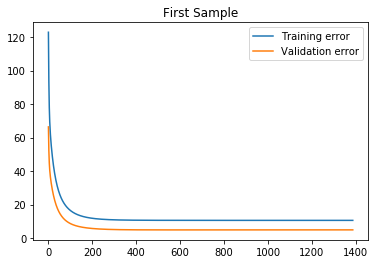

In [33]:
plt.plot([i for i in range(len(train_error1))], train_error1, label='Training error')
plt.plot([i for i in range(len(valid_error1))], valid_error1, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('First Sample')

In [34]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample2)
learning_rate = 0.01
train_error2, valid_error2, theta2 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Iteration:  0
Previous theta :  [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
New theta_0 : [1.43732465 1.30300788 1.59247561 1.28083021 1.44384227 1.29563189
 1.57255528 1.3208338  1.63181516 1.27051513 1.27276569 1.35689007
 1.5642803  1.33347688]
Training Error:  126.79057310145393
Iteration:  1
Previous theta :  [1.43732465 1.30300788 1.59247561 1.28083021 1.44384227 1.29563189
 1.57255528 1.3208338  1.63181516 1.27051513 1.27276569 1.35689007
 1.5642803  1.33347688]
New theta_0 : [1.37607905 1.1454082  1.64675195 1.11239955 1.39125286 1.14010834
 1.62153271 1.18381476 1.72232813 1.08519171 1.08983254 1.24105258
 1.60464112 1.2040822 ]
Training Error:  108.86001182138074
Iteration:  2
Previous theta :  [1.37607905 1.1454082  1.64675195 1.11239955 1.39125286 1.14010834
 1.62153271 1.18381476 1.72232813 1.08519171 1.08983254 1.24105258
 1.60464112 1.2040822 ]
New theta_0 : [1.3165207  1.01827519 1.67254601 0.98268186 1.34168611 1.02176108
 1.65274297 1.07878941 1.78165978

Training Error:  24.138142475358663
Iteration:  53
Previous theta :  [ 0.10332422  0.13167745  0.36546901  0.35064586  0.27161584  0.50420782
  1.09335827  0.37874628  0.917991   -0.17710206 -0.21143554  0.18972507
  0.61024213  0.32592961]
New theta_0 : [ 0.09715172  0.12902277  0.35396461  0.34702434  0.26437599  0.50003215
  1.08514042  0.37085173  0.90507636 -0.17829537 -0.21484393  0.18289867
  0.59775149  0.31807207]
Training Error:  23.797431148883298
Iteration:  54
Previous theta :  [ 0.09715172  0.12902277  0.35396461  0.34702434  0.26437599  0.50003215
  1.08514042  0.37085173  0.90507636 -0.17829537 -0.21484393  0.18289867
  0.59775149  0.31807207]
New theta_0 : [ 0.09126053  0.12646969  0.34282973  0.3434444   0.25741244  0.4958612
  1.07704706  0.36304288  0.89237349 -0.17929707 -0.21806296  0.17623281
  0.58558544  0.31030864]
Training Error:  23.467899379772206
Iteration:  55
Previous theta :  [ 0.09126053  0.12646969  0.34282973  0.3434444   0.25741244  0.4958612
  1.07

Training Error:  15.304436442229438
Iteration:  100
Previous theta :  [-0.01480198  0.06241694  0.08079568  0.21719275  0.11520125  0.32462866
  0.80369706  0.10337617  0.4713513  -0.12646292 -0.25679131 -0.01370476
  0.27112166  0.04740662]
New theta_0 : [-0.0153968   0.06149037  0.07822389  0.21499866  0.11414798  0.32129182
  0.79911268  0.09945857  0.46435083 -0.12441786 -0.25649917 -0.01632055
  0.26754921  0.04318499]
Training Error:  15.206964026601637
Iteration:  101
Previous theta :  [-0.0153968   0.06149037  0.07822389  0.21499866  0.11414798  0.32129182
  0.79911268  0.09945857  0.46435083 -0.12441786 -0.25649917 -0.01632055
  0.26754921  0.04318499]
New theta_0 : [-0.01595922  0.06057222  0.07573591  0.21282534  0.11313951  0.31797609
  0.79457818  0.09560852  0.45742459 -0.12236635 -0.25618738 -0.01889093
  0.26406869  0.03902045]
Training Error:  15.111542849464497
Iteration:  102
Previous theta :  [-0.01595922  0.06057222  0.07573591  0.21282534  0.11313951  0.31797609
 

New theta_0 : [-0.02358668  0.02414021  0.02195738  0.13133547  0.0942113   0.18655181
  0.63064867 -0.0230761   0.20308059 -0.0318549  -0.23280962 -0.10141375
  0.17017695 -0.10289047]
Training Error:  12.246884394398858
Iteration:  148
Previous theta :  [-0.02358668  0.02414021  0.02195738  0.13133547  0.0942113   0.18655181
  0.63064867 -0.0230761   0.20308059 -0.0318549  -0.23280962 -0.10141375
  0.17017695 -0.10289047]
New theta_0 : [-0.02357144  0.02344031  0.0216434   0.1298987   0.09410899  0.18411146
  0.62788954 -0.02466707  0.1986834  -0.03009722 -0.23226574 -0.10264333
  0.16906002 -0.10511972]
Training Error:  12.207496263402184
Iteration:  149
Previous theta :  [-0.02357144  0.02344031  0.0216434   0.1298987   0.09410899  0.18411146
  0.62788954 -0.02466707  0.1986834  -0.03009722 -0.23226574 -0.10264333
  0.16906002 -0.10511972]
New theta_0 : [-0.02355358  0.02274376  0.02135184  0.12847394  0.09401248  0.18168705
  0.6251587  -0.02622621  0.19432563 -0.02835086 -0.23172

  0.14143007 -0.16783874]
New theta_0 : [-2.21347300e-02  4.25836261e-04  2.13934504e-02  8.54290208e-02
  9.28323188e-02  1.06079769e-01  5.45169588e-01 -6.44294303e-02
  6.36820325e-02  2.56734750e-02 -2.14857644e-01 -1.37275895e-01
  1.40878261e-01 -1.69264408e-01]
Training Error:  11.153437017724352
Iteration:  185
Previous theta :  [-2.21347300e-02  4.25836261e-04  2.13934504e-02  8.54290208e-02
  9.28323188e-02  1.06079769e-01  5.45169588e-01 -6.44294303e-02
  6.36820325e-02  2.56734750e-02 -2.14857644e-01 -1.37275895e-01
  1.40878261e-01 -1.69264408e-01]
New theta_0 : [-2.20868320e-02 -1.53689417e-04  2.15995861e-02  8.43752053e-02
  9.28332452e-02  1.04162762e-01  5.43272458e-01 -6.51442888e-02
  6.05006943e-02  2.70213162e-02 -2.14444738e-01 -1.38020184e-01
  1.40335876e-01 -1.70673119e-01]
Training Error:  11.132168930339033
Iteration:  186
Previous theta :  [-2.20868320e-02 -1.53689417e-04  2.15995861e-02  8.43752053e-02
  9.28332452e-02  1.04162762e-01  5.43272458e-01 -6.51

Iteration:  231
Previous theta :  [-0.02019948 -0.02302452  0.03582176  0.04517816  0.09329967  0.0296127
  0.47451915 -0.08396742 -0.05813055  0.07806968 -0.19985007 -0.16347608
  0.12288067 -0.21978325]
New theta_0 : [-0.02016518 -0.02346435  0.03619567  0.04446964  0.09331219  0.02819132
  0.47330287 -0.08416461 -0.06029412  0.07901454 -0.19960742 -0.16389956
  0.1226021  -0.22061779]
Training Error:  10.444497548775853
Iteration:  232
Previous theta :  [-0.02016518 -0.02346435  0.03619567  0.04446964  0.09331219  0.02819132
  0.47330287 -0.08416461 -0.06029412  0.07901454 -0.19960742 -0.16389956
  0.1226021  -0.22061779]
New theta_0 : [-0.02013121 -0.02390135  0.03657044  0.04376738  0.09332463  0.02677917
  0.47209795 -0.08435485 -0.06243989  0.07995216 -0.19936797 -0.16431816
  0.12232687 -0.22144336]
Training Error:  10.434391533597472
Iteration:  233
Previous theta :  [-0.02013121 -0.02390135  0.03657044  0.04376738  0.09332463  0.02677917
  0.47209795 -0.08435485 -0.06243989  

New theta_0 : [-0.01933201 -0.03467646  0.04677762  0.02700898  0.09362154 -0.0080645
  0.44345569 -0.08731066 -0.11418341  0.10274746 -0.194015   -0.17399804
  0.11596306 -0.24072604]
Training Error:  10.21310045562505
Iteration:  260
Previous theta :  [-0.01933201 -0.03467646  0.04677762  0.02700898  0.09362154 -0.0080645
  0.44345569 -0.08731066 -0.11418341  0.10274746 -0.194015   -0.17399804
  0.11596306 -0.24072604]
New theta_0 : [-0.01930641 -0.03503926  0.04715183  0.02646407  0.09363086 -0.0092406
  0.44252513 -0.08735388 -0.11588882  0.10350585 -0.19385461 -0.17430389
  0.11576079 -0.24134161]
Training Error:  10.206542049675297
Iteration:  261
Previous theta :  [-0.01930641 -0.03503926  0.04715183  0.02646407  0.09363086 -0.0092406
  0.44252513 -0.08735388 -0.11588882  0.10350585 -0.19385461 -0.17430389
  0.11576079 -0.24134161]
New theta_0 : [-0.01928106 -0.03539959  0.04752535  0.02592418  0.09364005 -0.01040902
  0.44160296 -0.08739327 -0.11758037  0.10425862 -0.1936967  -

Training Error:  10.004717577169295
Iteration:  303
Previous theta :  [-0.01843202 -0.04820476  0.06194072  0.00765743  0.09391392 -0.05226531
  0.41007868 -0.08656247 -0.17632802  0.13083108 -0.18908593 -0.18464659
  0.1087839  -0.26239207]
New theta_0 : [-0.01841524 -0.04847291  0.06226516  0.00729602  0.09391832 -0.05315151
  0.40944265 -0.08649953 -0.17753144  0.13138685 -0.18901294 -0.1848435
  0.10864752 -0.26279699]
Training Error:  10.001307956368704
Iteration:  304
Previous theta :  [-0.01841524 -0.04847291  0.06226516  0.00729602  0.09391832 -0.05315151
  0.40944265 -0.08649953 -0.17753144  0.13138685 -0.18901294 -0.1848435
  0.10864752 -0.26279699]
New theta_0 : [-0.01839861 -0.04873913  0.06258814  0.00693818  0.09392262 -0.05403186
  0.40881209 -0.08643523 -0.17872519  0.13193875 -0.18894157 -0.18503853
  0.1085123  -0.26319815]
Training Error:  9.997949409844189
Iteration:  305
Previous theta :  [-0.01839861 -0.04873913  0.06258814  0.00693818  0.09392262 -0.05403186
  0.

New theta_0 : [-0.0178795  -0.05734397  0.07348739 -0.00405561  0.09402256 -0.08282094
  0.38888711 -0.08337644 -0.21677261  0.14992104 -0.18729929 -0.19111317
  0.10421424 -0.27573983]
Training Error:  9.903344226747324
Iteration:  342
Previous theta :  [-0.0178795  -0.05734397  0.07348739 -0.00405561  0.09402256 -0.08282094
  0.38888711 -0.08337644 -0.21677261  0.14992104 -0.18729929 -0.19111317
  0.10421424 -0.27573983]
New theta_0 : [-0.01786772 -0.05754567  0.07375337 -0.00429835  0.09402387 -0.08350497
  0.38842999 -0.0832818  -0.21765219  0.15034806 -0.18727845 -0.19125092
  0.10411479 -0.27602472]
Training Error:  9.901444356531462
Iteration:  343
Previous theta :  [-0.01786772 -0.05754567  0.07375337 -0.00429835  0.09402387 -0.08350497
  0.38842999 -0.0832818  -0.21765219  0.15034806 -0.18727845 -0.19125092
  0.10411479 -0.27602472]
New theta_0 : [-0.01785604 -0.05774589  0.07401786 -0.00453854  0.09402511 -0.08418444
  0.38797665 -0.0831868  -0.21852475  0.15077229 -0.1872586

Training Error:  9.848840590062869
Iteration:  379
Previous theta :  [-0.01750426 -0.06389516  0.08236719 -0.01149835  0.09403388 -0.10532016
  0.37424394 -0.07975055 -0.24505369  0.16403818 -0.18716171 -0.19551115
  0.1010011  -0.2848134 ]
New theta_0 : [-0.01749565 -0.0640484   0.08258084 -0.01166016  0.09403326 -0.10585428
  0.37390612 -0.07965181 -0.24570796  0.16437633 -0.18717379 -0.19561258
  0.10092623 -0.2850216 ]
Training Error:  9.847741438210129
Iteration:  380
Previous theta :  [-0.01749565 -0.0640484   0.08258084 -0.01166016  0.09403326 -0.10585428
  0.37390612 -0.07965181 -0.24570796  0.16437633 -0.18717379 -0.19561258
  0.10092623 -0.2850216 ]
New theta_0 : [-0.01748712 -0.0642005   0.08279316 -0.01182012  0.09403261 -0.10638484
  0.37357102 -0.07955316 -0.24635702  0.16471242 -0.18718658 -0.19571321
  0.10085192 -0.2852281 ]
Training Error:  9.846658301679266
Iteration:  381
Previous theta :  [-0.01748712 -0.0642005   0.08279316 -0.01182012  0.09403261 -0.10638484
  0.

Training Error:  9.81468018722506
Iteration:  420
Previous theta :  [-0.01720328 -0.06932735  0.09010782 -0.01679026  0.09397942 -0.12452759
  0.36238088 -0.07583805 -0.26802442  0.17637995 -0.18816653 -0.1990944
  0.09834888 -0.29210498]
New theta_0 : [-0.01719711 -0.06944017  0.09027226 -0.01688905  0.09397745 -0.12493307
  0.36213675 -0.07574746 -0.26849622  0.17664591 -0.18820218 -0.1991689
  0.0982938  -0.29225472]
Training Error:  9.814074654006516
Iteration:  421
Previous theta :  [-0.01719711 -0.06944017  0.09027226 -0.01688905  0.09397745 -0.12493307
  0.36213675 -0.07574746 -0.26849622  0.17664591 -0.18820218 -0.1991689
  0.0982938  -0.29225472]
New theta_0 : [-0.017191   -0.06955214  0.09043562 -0.01698658  0.09397546 -0.12533583
  0.36189453 -0.07565714 -0.26896427  0.17691038 -0.18823828 -0.19924287
  0.09823912 -0.2924033 ]
Training Error:  9.813477769082292
Iteration:  422
Previous theta :  [-0.017191   -0.06955214  0.09043562 -0.01698658  0.09397546 -0.12533583
  0.3618

New theta_0 : [-0.01698268 -0.07341031  0.09615774 -0.01998442  0.09387848 -0.13940877
  0.353593   -0.07229406 -0.2849336   0.1863849  -0.18999076 -0.2018145
  0.0963534  -0.2974955 ]
Training Error:  9.795415162257955
Iteration:  462
Previous theta :  [-0.01698268 -0.07341031  0.09615774 -0.01998442  0.09387848 -0.13940877
  0.353593   -0.07229406 -0.2849336   0.1863849  -0.18999076 -0.2018145
  0.0963534  -0.2974955 ]
New theta_0 : [-0.01697828 -0.07349282  0.09628213 -0.02003966  0.09387569 -0.1397142
  0.35341633 -0.07221653 -0.28527128  0.18659685 -0.19004101 -0.20187022
  0.09631303 -0.29760396]
Training Error:  9.795081688086347
Iteration:  463
Previous theta :  [-0.01697828 -0.07349282  0.09628213 -0.02003966  0.09387569 -0.1397142
  0.35341633 -0.07221653 -0.28527128  0.18659685 -0.19004101 -0.20187022
  0.09631303 -0.29760396]
New theta_0 : [-0.01697392 -0.07357471  0.09640568 -0.02009405  0.09387289 -0.14001757
  0.35324099 -0.07213932 -0.28560629  0.18680771 -0.19009153 -0

  0.09477256 -0.30173634]
New theta_0 : [-0.01680992 -0.07669856  0.1011845  -0.02180059  0.09373526 -0.15174837
  0.34657356 -0.06899977 -0.29822626  0.19527743 -0.1925802  -0.20407682
  0.09474378 -0.30181353]
Training Error:  9.783811358985899
Iteration:  509
Previous theta :  [-0.01680992 -0.07669856  0.1011845  -0.02180059  0.09373526 -0.15174837
  0.34657356 -0.06899977 -0.29822626  0.19527743 -0.1925802  -0.20407682
  0.09474378 -0.30181353]
New theta_0 : [-0.01680692 -0.07675691  0.10127504 -0.02182447  0.09373201 -0.15197063
  0.34644934 -0.06893725 -0.29845853  0.19544532 -0.19263925 -0.20411794
  0.09471522 -0.30189017]
Training Error:  9.783636409037532
Iteration:  510
Previous theta :  [-0.01680692 -0.07675691  0.10127504 -0.02182447  0.09373201 -0.15197063
  0.34644934 -0.06893725 -0.29845853  0.19544532 -0.19263925 -0.20411794
  0.09471522 -0.30189017]
New theta_0 : [-0.01680394 -0.07681485  0.10136497 -0.02184785  0.09372874 -0.1521914
  0.34632604 -0.06887505 -0.298688

Iteration:  564
Previous theta :  [-0.01667685 -0.07935509  0.10535764 -0.02247632  0.09354985 -0.16198987
  0.34092979 -0.06598786 -0.30860989  0.20345814 -0.19595695 -0.20600042
  0.09344608 -0.30530874]
New theta_0 : [-0.01667496 -0.07939434  0.10542012 -0.02247877  0.09354642 -0.16214304
  0.3408466  -0.0659406  -0.30875968  0.20358921 -0.19601986 -0.20602978
  0.09342698 -0.30536051]
Training Error:  9.776833055332949
Iteration:  565
Previous theta :  [-0.01667496 -0.07939434  0.10542012 -0.02247877  0.09354642 -0.16214304
  0.3408466  -0.0659406  -0.30875968  0.20358921 -0.19601986 -0.20602978
  0.09342698 -0.30536051]
New theta_0 : [-0.01667309 -0.0794333   0.10548219 -0.02248093  0.09354298 -0.16229518
  0.34076399 -0.06589359 -0.30890829  0.20371972 -0.1960828  -0.20605896
  0.09340803 -0.30541191]
Training Error:  9.776748483750657
Iteration:  566
Previous theta :  [-0.01667309 -0.0794333   0.10548219 -0.02248093  0.09354298 -0.16229518
  0.34076399 -0.06589359 -0.30890829  0

  0.09257778 -0.3076832 ]
New theta_0 : [-0.01659332 -0.08117769  0.10828902 -0.02226119  0.09335829 -0.16915387
  0.33707308 -0.06369256 -0.31539873  0.21002233 -0.19948544 -0.20740357
  0.09256499 -0.30771859]
Training Error:  9.773419879111266
Iteration:  620
Previous theta :  [-0.01659332 -0.08117769  0.10828902 -0.02226119  0.09335829 -0.16915387
  0.33707308 -0.06369256 -0.31539873  0.21002233 -0.19948544 -0.20740357
  0.09256499 -0.30771859]
New theta_0 : [-0.01659219 -0.08120422  0.10833217 -0.02225217  0.09335492 -0.16925875
  0.3370171  -0.06365751 -0.31549441  0.21012667 -0.199548   -0.20742467
  0.09255229 -0.30775374]
Training Error:  9.773376004037205
Iteration:  621
Previous theta :  [-0.01659219 -0.08120422  0.10833217 -0.02225217  0.09335492 -0.16925875
  0.3370171  -0.06365751 -0.31549441  0.21012667 -0.199548   -0.20742467
  0.09255229 -0.30775374]
New theta_0 : [-0.01659107 -0.08123057  0.10837504 -0.02224301  0.09335154 -0.16936292
  0.3369615  -0.06362265 -0.31558

New theta_0 : [-0.01654789 -0.08232557  0.11017095 -0.02165819  0.09319022 -0.17369414
  0.33465794 -0.06212653 -0.319418    0.21487164 -0.20262012 -0.20833817
  0.09202158 -0.30924007]
Training Error:  9.771696048752572
Iteration:  671
Previous theta :  [-0.01654789 -0.08232557  0.11017095 -0.02165819  0.09319022 -0.17369414
  0.33465794 -0.06212653 -0.319418    0.21487164 -0.20262012 -0.20833817
  0.09202158 -0.30924007]
New theta_0 : [-0.01654722 -0.0823444   0.1102021  -0.0216441   0.09318702 -0.17376848
  0.33461849 -0.06209995 -0.31948146  0.21495793 -0.20268019 -0.20835389
  0.09201281 -0.30926501]
Training Error:  9.771670658738191
Iteration:  672
Previous theta :  [-0.01654722 -0.0823444   0.1102021  -0.0216441   0.09318702 -0.17376848
  0.33461849 -0.06209995 -0.31948146  0.21495793 -0.20268019 -0.20835389
  0.09201281 -0.30926501]
New theta_0 : [-0.01654655 -0.0823631   0.11023305 -0.02162995  0.09318382 -0.17384232
  0.33457931 -0.06207351 -0.31954442  0.21504391 -0.2027401

New theta_0 : [-0.01652595 -0.08300539  0.11130233 -0.02103864  0.09306256 -0.17636656
  0.33323916 -0.06114667 -0.32164129  0.21817247 -0.20502758 -0.20891495
  0.09170877 -0.31013887]
Training Error:  9.770834294981906
Iteration:  712
Previous theta :  [-0.01652595 -0.08300539  0.11130233 -0.02103864  0.09306256 -0.17636656
  0.33323916 -0.06114667 -0.32164129  0.21817247 -0.20502758 -0.20891495
  0.09170877 -0.31013887]
New theta_0 : [-0.01652554 -0.08301984  0.11132654 -0.02102272  0.09305954 -0.17642298
  0.33320916 -0.06112538 -0.32168681  0.2182473  -0.20508479 -0.20892742
  0.09170224 -0.31015792]
Training Error:  9.77081716603182
Iteration:  713
Previous theta :  [-0.01652554 -0.08301984  0.11132654 -0.02102272  0.09305954 -0.17642298
  0.33320916 -0.06112538 -0.32168681  0.2182473  -0.20508479 -0.20892742
  0.09170224 -0.31015792]
New theta_0 : [-0.01652514 -0.0830342   0.11135061 -0.02100677  0.09305653 -0.17647903
  0.33317935 -0.06110421 -0.32173196  0.21832188 -0.20514192

New theta_0 : [-0.01651088 -0.08365987  0.11240722 -0.02017193  0.0929093  -0.17889178
  0.33188993 -0.0601623  -0.3236075   0.2218169  -0.20794993 -0.20948802
  0.09141932 -0.31099648]
Training Error:  9.770103934377936
Iteration:  765
Previous theta :  [-0.01651088 -0.08365987  0.11240722 -0.02017193  0.0929093  -0.17889178
  0.33188993 -0.0601623  -0.3236075   0.2218169  -0.20794993 -0.20948802
  0.09141932 -0.31099648]
New theta_0 : [-0.01651071 -0.0836703   0.11242498 -0.02015539  0.09290655 -0.17893135
  0.33186863 -0.06014628 -0.32363699  0.22187985 -0.20800284 -0.20949729
  0.09141484 -0.31101003]
Training Error:  9.77009301118454
Iteration:  766
Previous theta :  [-0.01651071 -0.0836703   0.11242498 -0.02015539  0.09290655 -0.17893135
  0.33186863 -0.06014628 -0.32363699  0.22187985 -0.20800284 -0.20949729
  0.09141484 -0.31101003]
New theta_0 : [-0.01651054 -0.08368067  0.11244263 -0.02013885  0.09290379 -0.17897065
  0.33184747 -0.06013034 -0.32366625  0.22194259 -0.20805567

New theta_0 : [-0.01650625 -0.08406551  0.11310225 -0.01945016  0.09279272 -0.18040571
  0.33106837 -0.05953168 -0.32469968  0.22440933 -0.21019708 -0.20985111
  0.09124937 -0.31151907]
Training Error:  9.769694085732423
Iteration:  809
Previous theta :  [-0.01650625 -0.08406551  0.11310225 -0.01945016  0.09279272 -0.18040571
  0.33106837 -0.05953168 -0.32469968  0.22440933 -0.21019708 -0.20985111
  0.09124937 -0.31151907]
New theta_0 : [-0.01650621 -0.08407359  0.11311619 -0.019434    0.09279019 -0.18043523
  0.33105218 -0.05951898 -0.32472015  0.22446429 -0.2102462  -0.20985839
  0.09124609 -0.31152936]
Training Error:  9.769686225116594
Iteration:  810
Previous theta :  [-0.01650621 -0.08407359  0.11311619 -0.019434    0.09279019 -0.18043523
  0.33105218 -0.05951898 -0.32472015  0.22446429 -0.2102462  -0.20985839
  0.09124609 -0.31152936]
New theta_0 : [-0.01650617 -0.08408162  0.11313005 -0.01941785  0.09278766 -0.18046456
  0.33103609 -0.05950634 -0.32474045  0.22451908 -0.2102952

Iteration:  849
Previous theta :  [-0.01650625 -0.08435602  0.1136064  -0.01881703  0.09269513 -0.18144664
  0.33049134 -0.05907148 -0.32539792  0.22648479 -0.21209462 -0.21011342
  0.0911345  -0.31188535]
New theta_0 : [-0.01650629 -0.0843625   0.11361772 -0.0188016   0.09269279 -0.1814693
  0.3304786  -0.05906115 -0.32541253  0.22653361 -0.21214029 -0.21011928
  0.09113202 -0.31189342]
Training Error:  9.769412233699372
Iteration:  850
Previous theta :  [-0.01650629 -0.0843625   0.11361772 -0.0188016   0.09269279 -0.1814693
  0.3304786  -0.05906115 -0.32541253  0.22653361 -0.21214029 -0.21011928
  0.09113202 -0.31189342]
New theta_0 : [-0.01650633 -0.08436895  0.11362899 -0.01878619  0.09269046 -0.18149181
  0.33046595 -0.05905087 -0.32542701  0.22658229 -0.21218587 -0.21012511
  0.09112955 -0.31190144]
Training Error:  9.769406275371512
Iteration:  851
Previous theta :  [-0.01650633 -0.08436895  0.11362899 -0.01878619  0.09269046 -0.18149181
  0.33046595 -0.05905087 -0.32542701  0.2

Training Error:  9.769168967507275
Iteration:  897
Previous theta :  [-0.01650979 -0.08463186  0.11409146 -0.01810214  0.09258822 -0.1823828
  0.32995649 -0.05862996 -0.32597505  0.22867723 -0.2141906  -0.2103622
  0.09103287 -0.31222314]
New theta_0 : [-0.01650989 -0.08463692  0.11410042 -0.01808784  0.09258611 -0.18239934
  0.32994683 -0.05862185 -0.32598471  0.22871981 -0.2142322  -0.21036674
  0.09103109 -0.31222921]
Training Error:  9.769164512031535
Iteration:  898
Previous theta :  [-0.01650989 -0.08463692  0.11410042 -0.01808784  0.09258611 -0.18239934
  0.32994683 -0.05862185 -0.32598471  0.22871981 -0.2142322  -0.21036674
  0.09103109 -0.31222921]
New theta_0 : [-0.01651    -0.08464195  0.11410934 -0.01807356  0.092584   -0.18241578
  0.32993723 -0.05861377 -0.32599428  0.22876227 -0.21427372 -0.21037126
  0.09102933 -0.31223525]
Training Error:  9.769160082897232
Iteration:  899
Previous theta :  [-0.01651    -0.08464195  0.11410934 -0.01807356  0.092584   -0.18241578
  0.32

New theta_0 : [-0.01651622 -0.08486083  0.11450006 -0.0174055   0.09248615 -0.18310357
  0.3295262  -0.05826281 -0.32637291  0.23070531 -0.21620862 -0.21056607
  0.09095599 -0.31249239]
Training Error:  9.768971659212985
Iteration:  948
Previous theta :  [-0.01651622 -0.08486083  0.11450006 -0.0174055   0.09248615 -0.18310357
  0.3295262  -0.05826281 -0.32637291  0.23070531 -0.21620862 -0.21056607
  0.09095599 -0.31249239]
New theta_0 : [-0.01651636 -0.08486479  0.11450718 -0.01739252  0.09248426 -0.18311547
  0.3295189  -0.05825648 -0.32637903  0.23074231 -0.21624612 -0.21056956
  0.09095473 -0.31249693]
Training Error:  9.768968331439542
Iteration:  949
Previous theta :  [-0.01651636 -0.08486479  0.11450718 -0.01739252  0.09248426 -0.18311547
  0.3295189  -0.05825648 -0.32637903  0.23074231 -0.21624612 -0.21056956
  0.09095473 -0.31249693]
New theta_0 : [-0.01651651 -0.08486873  0.11451427 -0.01737956  0.09248237 -0.18312728
  0.32951163 -0.05825018 -0.32638509  0.23077922 -0.2162835

New theta_0 : [-0.01652386 -0.08503531  0.11481596 -0.01679996  0.09239841 -0.18360547
  0.32920959 -0.05798516 -0.32661499  0.23240649 -0.21795601 -0.21071772
  0.09090333 -0.31268794]
Training Error:  9.768828151675812
Iteration:  997
Previous theta :  [-0.01652386 -0.08503531  0.11481596 -0.01679996  0.09239841 -0.18360547
  0.32920959 -0.05798516 -0.32661499  0.23240649 -0.21795601 -0.21071772
  0.09090333 -0.31268794]
New theta_0 : [-0.01652402 -0.08503849  0.11482177 -0.01678825  0.09239672 -0.18361417
  0.32920392 -0.05798013 -0.32661885  0.23243895 -0.21798981 -0.21072045
  0.09090242 -0.31269141]
Training Error:  9.768825597668581
Iteration:  998
Previous theta :  [-0.01652402 -0.08503849  0.11482177 -0.01678825  0.09239672 -0.18361417
  0.32920392 -0.05798013 -0.32661885  0.23243895 -0.21798981 -0.21072045
  0.09090242 -0.31269141]
New theta_0 : [-0.01652419 -0.08504167  0.11482755 -0.01677656  0.09239504 -0.18362281
  0.32919828 -0.05797512 -0.32662268  0.23247132 -0.2180235

New theta_0 : [-0.01653267 -0.08518451  0.11508982 -0.01622404  0.09231542 -0.18399264
  0.32894874 -0.05775144 -0.32677267  0.2339863  -0.21961978 -0.21084308
  0.09086331 -0.3128464 ]
Training Error:  9.76871153695264
Iteration:  1049
Previous theta :  [-0.01653267 -0.08518451  0.11508982 -0.01622404  0.09231542 -0.18399264
  0.32894874 -0.05775144 -0.32677267  0.2339863  -0.21961978 -0.21084308
  0.09086331 -0.3128464 ]
New theta_0 : [-0.01653285 -0.08518709  0.11509458 -0.01621362  0.09231392 -0.18399892
  0.32894434 -0.05774746 -0.32677495  0.23401463 -0.21964996 -0.21084519
  0.09086267 -0.31284905]
Training Error:  9.768709586899236
Iteration:  1050
Previous theta :  [-0.01653285 -0.08518709  0.11509458 -0.01621362  0.09231392 -0.18399892
  0.32894434 -0.05774746 -0.32677495  0.23401463 -0.21964996 -0.21084519
  0.09086267 -0.31284905]
New theta_0 : [-0.01653302 -0.08518965  0.11509931 -0.01620321  0.09231242 -0.18400517
  0.32893995 -0.05774349 -0.32677721  0.23404289 -0.219680

Iteration:  1091
Previous theta :  [-0.01653993 -0.08528442  0.11527538 -0.01580614  0.0922553  -0.18422588
  0.32878015 -0.05759808 -0.32684995  0.23511561 -0.22083133 -0.21092386
  0.09083952 -0.31294697]
New theta_0 : [-0.0165401  -0.08528661  0.11527947 -0.01579668  0.09225394 -0.18423074
  0.32877652 -0.05759476 -0.32685138  0.23514104 -0.22085882 -0.2109256
  0.09083902 -0.31294912]
Training Error:  9.768636010723629
Iteration:  1092
Previous theta :  [-0.0165401  -0.08528661  0.11527947 -0.01579668  0.09225394 -0.18423074
  0.32877652 -0.05759476 -0.32685138  0.23514104 -0.22085882 -0.2109256
  0.09083902 -0.31294912]
New theta_0 : [-0.01654028 -0.08528879  0.11528355 -0.01578724  0.09225258 -0.18423557
  0.3287729  -0.05759144 -0.32685279  0.23516641 -0.22088625 -0.21092733
  0.09083854 -0.31295126]
Training Error:  9.7686344418113
Iteration:  1093
Previous theta :  [-0.01654028 -0.08528879  0.11528355 -0.01578724  0.09225258 -0.18423557
  0.3287729  -0.05759144 -0.32685279  0.

New theta_0 : [-0.01654909 -0.08539205  0.11547745 -0.0153259   0.09218619 -0.18445044
  0.32860474 -0.05743681 -0.32690605  0.23640064 -0.22223044 -0.21100723
  0.09081687 -0.31304954]
Training Error:  9.76856275520905
Iteration:  1145
Previous theta :  [-0.01654909 -0.08539205  0.11547745 -0.0153259   0.09218619 -0.18445044
  0.32860474 -0.05743681 -0.32690605  0.23640064 -0.22223044 -0.21100723
  0.09081687 -0.31304954]
New theta_0 : [-0.01654925 -0.08539385  0.11548086 -0.01531758  0.09218499 -0.18445395
  0.32860186 -0.05743415 -0.32690674  0.23642282 -0.22225477 -0.21100859
  0.09081652 -0.31305121]
Training Error:  9.768561549757461
Iteration:  1146
Previous theta :  [-0.01654925 -0.08539385  0.11548086 -0.01531758  0.09218499 -0.18445395
  0.32860186 -0.05743415 -0.32690674  0.23642282 -0.22225477 -0.21100859
  0.09081652 -0.31305121]
New theta_0 : [-0.01654942 -0.08539565  0.11548426 -0.01530927  0.0921838  -0.18445745
  0.32859898 -0.05743149 -0.32690743  0.23644495 -0.222279

Text(0.5,1,'Second Sample')

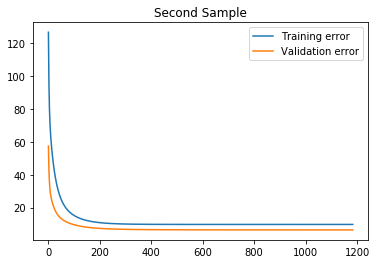

In [35]:
plt.plot([i for i in range(len(train_error2))], train_error2, label='Training error')
plt.plot([i for i in range(len(valid_error2))], valid_error2, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Second Sample')

In [36]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample3)
learning_rate = 0.01
train_error3, valid_error3, theta3 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Iteration:  0
Previous theta :  [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
New theta_0 : [1.43776642 1.29794495 1.58758672 1.29046651 1.45470428 1.30567128
 1.56717293 1.32860196 1.63040565 1.28219499 1.28365147 1.36945835
 1.56300111 1.34050264]
Training Error:  124.46514624129296
Iteration:  1
Previous theta :  [1.43776642 1.29794495 1.58758672 1.29046651 1.45470428 1.30567128
 1.56717293 1.32860196 1.63040565 1.28219499 1.28365147 1.36945835
 1.56300111 1.34050264]
New theta_0 : [1.3770235  1.1346588  1.63869959 1.12891502 1.40988965 1.15681205
 1.6122226  1.19753908 1.72093248 1.10606205 1.10925418 1.26346422
 1.60277699 1.21515492]
Training Error:  107.53699428164059
Iteration:  2
Previous theta :  [1.3770235  1.1346588  1.63869959 1.12891502 1.40988965 1.15681205
 1.6122226  1.19753908 1.72093248 1.10606205 1.10925418 1.26346422
 1.60277699 1.21515492]
New theta_0 : [1.31800702 1.00153594 1.66255066 1.00408046 1.36577406 1.04268913
 1.64054704 1.09717316 1.78123069

New theta_0 : [ 0.14759877  0.02977739  0.4230741   0.38994501  0.31572523  0.51638256
  1.07448966  0.49203814  1.01563538 -0.09077924 -0.11957742  0.27646912
  0.64411883  0.24276013]
Training Error:  26.556941104572456
Iteration:  49
Previous theta :  [ 0.14759877  0.02977739  0.4230741   0.38994501  0.31572523  0.51638256
  1.07448966  0.49203814  1.01563538 -0.09077924 -0.11957742  0.27646912
  0.64411883  0.24276013]
New theta_0 : [ 0.14024872  0.0267954   0.41021249  0.38599162  0.30704037  0.51210764
  1.06483405  0.48468885  1.00172736 -0.09317667 -0.12400335  0.26828155
  0.62974428  0.23244285]
Training Error:  26.154541177096174
Iteration:  50
Previous theta :  [ 0.14024872  0.0267954   0.41021249  0.38599162  0.30704037  0.51210764
  1.06483405  0.48468885  1.00172736 -0.09317667 -0.12400335  0.26828155
  0.62974428  0.23244285]
New theta_0 : [ 0.13322969  0.02397509  0.39777327  0.38208573  0.29867862  0.50784661
  1.05532491  0.47740701  0.98804065 -0.09535955 -0.1282188

Training Error:  15.865847145793344
Iteration:  99
Previous theta :  [ 0.00245666 -0.02475696  0.10096631  0.23959112  0.1181786   0.32843104
  0.72076848  0.21985746  0.50857045 -0.0757285  -0.1979967   0.01451461
  0.2430846  -0.13055982]
New theta_0 : [ 0.00179382 -0.02508805  0.09847286  0.23734392  0.116883    0.32524831
  0.71568524  0.21628577  0.50118205 -0.07423323 -0.19809247  0.01136155
  0.23938557 -0.13558623]
Training Error:  15.761899389835136
Iteration:  100
Previous theta :  [ 0.00179382 -0.02508805  0.09847286  0.23734392  0.116883    0.32524831
  0.71568524  0.21628577  0.50118205 -0.07423323 -0.19809247  0.01136155
  0.23938557 -0.13558623]
New theta_0 : [ 0.00116469 -0.0254129   0.09606479  0.23511883  0.11563457  0.32208667
  0.71066152  0.21277532  0.49387081 -0.07272662 -0.1981653   0.00826269
  0.2357867  -0.14053809]
Training Error:  15.660244017012072
Iteration:  101
Previous theta :  [ 0.00116469 -0.0254129   0.09606479  0.23511883  0.11563457  0.32208667
  

New theta_0 : [-0.00810872 -0.03536767  0.05070504  0.16899882  0.09110453  0.2235263
  0.56722649  0.12230248  0.27910418 -0.01819949 -0.19225963 -0.07304774
  0.155644   -0.27448552]
Training Error:  13.168987895901429
Iteration:  136
Previous theta :  [-0.00810872 -0.03536767  0.05070504  0.16899882  0.09110453  0.2235263
  0.56722649  0.12230248  0.27910418 -0.01819949 -0.19225963 -0.07304774
  0.155644   -0.27448552]
New theta_0 : [-0.00817032 -0.03565018  0.05019633  0.16739547  0.09074082  0.2210238
  0.56392637  0.12048092  0.27396781 -0.01668939 -0.19196826 -0.07475703
  0.15428165 -0.27737861]
Training Error:  13.120277849992199
Iteration:  137
Previous theta :  [-0.00817032 -0.03565018  0.05019633  0.16739547  0.09074082  0.2210238
  0.56392637  0.12048092  0.27396781 -0.01668939 -0.19196826 -0.07475703
  0.15428165 -0.27737861]
New theta_0 : [-0.00822633 -0.03593352  0.04971762  0.16580575  0.09038791  0.21853708
  0.56066433  0.1186937   0.26887894 -0.01518532 -0.19167454 

Training Error:  11.753509136101492
Iteration:  177
Previous theta :  [-0.00809484 -0.04755607  0.04733774  0.11313057  0.08185367  0.1327156
  0.45881569  0.07039625  0.10241353  0.03782972 -0.18013302 -0.12540935
  0.1206896  -0.36408785]
New theta_0 : [-0.0080646  -0.04786285  0.04755463  0.11199098  0.08171455  0.13077507
  0.45675639  0.06958921  0.09885497  0.03903425 -0.1798634  -0.12632787
  0.12020633 -0.36566836]
Training Error:  11.73026860320276
Iteration:  178
Previous theta :  [-0.0080646  -0.04786285  0.04755463  0.11199098  0.08171455  0.13077507
  0.45675639  0.06958921  0.09885497  0.03903425 -0.1798634  -0.12632787
  0.12020633 -0.36566836]
New theta_0 : [-0.00803398 -0.04816968  0.04778012  0.11086076  0.08157768  0.12884639
  0.45472035  0.06879879  0.09532712  0.04023101 -0.17959592 -0.1272332
  0.11973455 -0.36722591]
Training Error:  11.707425265316255
Iteration:  179
Previous theta :  [-0.00803398 -0.04816968  0.04778012  0.11086076  0.08157768  0.12884639
  0.

New theta_0 : [-0.00697454 -0.05814968  0.0584851   0.07837717  0.07793899  0.0713787
  0.39892063  0.05029597 -0.00565528  0.07556323 -0.17208903 -0.15095642
  0.10899964 -0.40772715]
Training Error:  11.134745133094508
Iteration:  212
Previous theta :  [-0.00697454 -0.05814968  0.0584851   0.07837717  0.07793899  0.0713787
  0.39892063  0.05029597 -0.00565528  0.07556323 -0.17208903 -0.15095642
  0.10899964 -0.40772715]
New theta_0 : [-0.00694405 -0.05844301  0.05887074  0.07752643  0.07784734  0.06981154
  0.39752966  0.04991979 -0.00829657  0.07651505 -0.1719027  -0.15152114
  0.10878279 -0.40867657]
Training Error:  11.12182991588679
Iteration:  213
Previous theta :  [-0.00694405 -0.05844301  0.05887074  0.07752643  0.07784734  0.06981154
  0.39752966  0.04991979 -0.00829657  0.07651505 -0.1719027  -0.15152114
  0.10878279 -0.40867657]
New theta_0 : [-0.00691377 -0.05873556  0.05925825  0.07668289  0.07775646  0.06825392
  0.39615395  0.04955219 -0.01091582  0.07746035 -0.17171877

New theta_0 : [-0.00594677 -0.06889934  0.07406513  0.05008217  0.07481814  0.01684638
  0.35449698  0.04069269 -0.09400854  0.1082407  -0.16648914 -0.16838883
  0.10315486 -0.436222  ]
Training Error:  10.758135950131283
Iteration:  251
Previous theta :  [-0.00594677 -0.06889934  0.07406513  0.05008217  0.07481814  0.01684638
  0.35449698  0.04069269 -0.09400854  0.1082407  -0.16648914 -0.16838883
  0.10315486 -0.436222  ]
New theta_0 : [-0.00592479 -0.06915381  0.07446078  0.0494765   0.07474797  0.01561291
  0.35358543  0.04055215 -0.09592159  0.10896941 -0.16638703 -0.16873445
  0.10305701 -0.43676179]
Training Error:  10.751231476105469
Iteration:  252
Previous theta :  [-0.00592479 -0.06915381  0.07446078  0.0494765   0.07474797  0.01561291
  0.35358543  0.04055215 -0.09592159  0.10896941 -0.16638703 -0.16873445
  0.10305701 -0.43676179]
New theta_0 : [-0.00590302 -0.06940712  0.07485552  0.04887624  0.07467821  0.01438705
  0.35268351  0.04041554 -0.09781906  0.1096932  -0.16628

Iteration:  276
Previous theta :  [-0.00545528 -0.07490969  0.08361289  0.03647213  0.07317773 -0.01180875
  0.33435885  0.03818894 -0.1374568   0.12506743 -0.16446282 -0.17593651
  0.10118406 -0.44762401]
New theta_0 : [-0.00543795 -0.07513472  0.08397722  0.03599005  0.07311673 -0.0128649
  0.33365772  0.03812543 -0.1390181   0.12568401 -0.16440296 -0.17619652
  0.10112251 -0.44799956]
Training Error:  10.609549014437002
Iteration:  277
Previous theta :  [-0.00543795 -0.07513472  0.08397722  0.03599005  0.07311673 -0.0128649
  0.33365772  0.03812543 -0.1390181   0.12568401 -0.16440296 -0.17619652
  0.10112251 -0.44799956]
New theta_0 : [-0.00542079 -0.07535856  0.08434002  0.03551243  0.07305605 -0.01391448
  0.33296382  0.03806423 -0.14056685  0.12629654 -0.16434461 -0.17645372
  0.10106205 -0.44836969]
Training Error:  10.604949930248669
Iteration:  278
Previous theta :  [-0.00542079 -0.07535856  0.08434002  0.03551243  0.07305605 -0.01391448
  0.33296382  0.03806423 -0.14056685  0

  0.09927853 -0.45989516]
New theta_0 : [-0.00481553 -0.08388857  0.09837442  0.01874571  0.07073401 -0.05334695
  0.3089425   0.03701469 -0.19664832  0.14922153 -0.16306631 -0.18533412
  0.09924975 -0.46009175]
Training Error:  10.461332411358391
Iteration:  321
Previous theta :  [-0.00481553 -0.08388857  0.09837442  0.01874571  0.07073401 -0.05334695
  0.3089425   0.03701469 -0.19664832  0.14922153 -0.16306631 -0.18533412
  0.09924975 -0.46009175]
New theta_0 : [-0.00480408 -0.08406244  0.09866316  0.01843359  0.07068615 -0.0541427
  0.30849843  0.03701606 -0.19773679  0.14968405 -0.16306119 -0.18549935
  0.09922144 -0.46028543]
Training Error:  10.458985729656774
Iteration:  322
Previous theta :  [-0.00480408 -0.08406244  0.09866316  0.01843359  0.07068615 -0.0541427
  0.30849843  0.03701606 -0.19773679  0.14968405 -0.16306119 -0.18549935
  0.09922144 -0.46028543]
New theta_0 : [-0.00479274 -0.08423525  0.0989502   0.01812459  0.07063855 -0.05493343
  0.30805875  0.03701821 -0.19881

Training Error:  10.382764184346305
Iteration:  367
Previous theta :  [-0.00437884 -0.09086018  0.10995675  0.00725583  0.068779   -0.08517703
  0.29242342  0.03762675 -0.23877003  0.16785182 -0.16367672 -0.1916099
  0.09833647 -0.46655469]
New theta_0 : [-0.00437109 -0.09099012  0.11017202  0.00706322  0.06874165 -0.08577024
  0.29213979  0.03764776 -0.23952642  0.1682033  -0.16370619 -0.1917213
  0.09832352 -0.46665037]
Training Error:  10.3815832430881
Iteration:  368
Previous theta :  [-0.00437109 -0.09099012  0.11017202  0.00706322  0.06874165 -0.08577024
  0.29213979  0.03764776 -0.23952642  0.1682033  -0.16370619 -0.1917213
  0.09832352 -0.46665037]
New theta_0 : [-0.00436339 -0.09111922  0.11038584  0.00687272  0.06870451 -0.08635965
  0.29185886  0.03766893 -0.24027687  0.16855276 -0.16373624 -0.19183182
  0.09831078 -0.46674453]
Training Error:  10.380419585073968
Iteration:  369
Previous theta :  [-0.00436339 -0.09111922  0.11038584  0.00687272  0.06870451 -0.08635965
  0.29

New theta_0 : [-0.00410575 -0.09554538  0.11767469  0.00090503  0.06740138 -0.10661935
  0.2827401   0.03855844 -0.26538951  0.18075436 -0.16528829 -0.19554731
  0.0979583  -0.46944111]
Training Error:  10.346092460881485
Iteration:  408
Previous theta :  [-0.00410575 -0.09554538  0.11767469  0.00090503  0.06740138 -0.10661935
  0.2827401   0.03855844 -0.26538951  0.18075436 -0.16528829 -0.19554731
  0.0979583  -0.46944111]
New theta_0 : [-0.00410009 -0.09564449  0.11783669  0.00078517  0.06737142 -0.10707463
  0.2825473   0.03858159 -0.26593794  0.18103403 -0.16533633 -0.19562933
  0.09795228 -0.46948962]
Training Error:  10.345442821180015
Iteration:  409
Previous theta :  [-0.00410009 -0.09564449  0.11783669  0.00078517  0.06737142 -0.10707463
  0.2825473   0.03858159 -0.26593794  0.18103403 -0.16533633 -0.19562933
  0.09795228 -0.46948962]
New theta_0 : [-0.00409448 -0.09574294  0.11799754  0.00066677  0.06734161 -0.10752696
  0.28235629  0.03860471 -0.2664821   0.18131219 -0.16538

New theta_0 : [-0.00391709 -0.09888169  0.1230852  -0.00272973  0.0663675  -0.12200075
  0.2765288   0.03939854 -0.28349561  0.1904061  -0.16732071 -0.19829962
  0.09780257 -0.47078287]
Training Error:  10.326905916904566
Iteration:  446
Previous theta :  [-0.00391709 -0.09888169  0.1230852  -0.00272973  0.0663675  -0.12200075
  0.2765288   0.03939854 -0.28349561  0.1904061  -0.16732071 -0.19829962
  0.09780257 -0.47078287]
New theta_0 : [-0.00391277 -0.09895851  0.12320858 -0.00280273  0.06634299 -0.12235641
  0.27639265  0.03941918 -0.28390348  0.19063526 -0.16737899 -0.19836301
  0.09780016 -0.47080658]
Training Error:  10.326527409728849
Iteration:  447
Previous theta :  [-0.00391277 -0.09895851  0.12320858 -0.00280273  0.06634299 -0.12235641
  0.27639265  0.03941918 -0.28390348  0.19063526 -0.16737899 -0.19836301
  0.09780016 -0.47080658]
New theta_0 : [-0.00390849 -0.09903481  0.12333107 -0.0028747   0.06631861 -0.12270976
  0.27625773  0.03943972 -0.2843082   0.19086326 -0.16743

Training Error:  10.314773747821189
Iteration:  488
Previous theta :  [-0.00375825 -0.10170182  0.12756963 -0.00502135  0.06544021 -0.13510988
  0.27174239  0.04018336 -0.29817195  0.19911144 -0.16990763 -0.20064244
  0.09775176 -0.47143336]
New theta_0 : [-0.00375496 -0.10175974  0.12766065 -0.00505907  0.06542048 -0.13538028
  0.27164878  0.04019996 -0.29846648  0.19929773 -0.1699719  -0.20069105
  0.09775157 -0.47144186]
Training Error:  10.314561549990941
Iteration:  489
Previous theta :  [-0.00375496 -0.10175974  0.12766065 -0.00505907  0.06542048 -0.13538028
  0.27164878  0.04019996 -0.29846648  0.19929773 -0.1699719  -0.20069105
  0.09775157 -0.47144186]
New theta_0 : [-0.0037517  -0.10181728  0.12775101 -0.00509611  0.06540085 -0.13564891
  0.27155599  0.04021645 -0.29875874  0.19948313 -0.17003627 -0.20073937
  0.09775142 -0.47145011]
Training Error:  10.314352200359211
Iteration:  490
Previous theta :  [-0.0037517  -0.10181728  0.12775101 -0.00509611  0.06540085 -0.13564891
 

New theta_0 : [-0.00362341 -0.10404607  0.13121036 -0.00616724  0.06461229 -0.14608738
  0.26811713  0.04086337 -0.30982586  0.20699009 -0.17299523 -0.20263656
  0.09777559 -0.47161257]
Training Error:  10.30731121508579
Iteration:  535
Previous theta :  [-0.00362341 -0.10404607  0.13121036 -0.00616724  0.06461229 -0.14608738
  0.26811713  0.04086337 -0.30982586  0.20699009 -0.17299523 -0.20263656
  0.09777559 -0.47161257]
New theta_0 : [-0.00362093 -0.10408841  0.13127524 -0.00617981  0.06459669 -0.14628623
  0.26805486  0.04087576 -0.3100308   0.20714001 -0.17306176 -0.20267319
  0.09777665 -0.47161261]
Training Error:  10.307197043108658
Iteration:  536
Previous theta :  [-0.00362093 -0.10408841  0.13127524 -0.00617981  0.06459669 -0.14628623
  0.26805486  0.04087576 -0.3100308   0.20714001 -0.17306176 -0.20267319
  0.09777665 -0.47161261]
New theta_0 : [-0.00361845 -0.10413048  0.13133966 -0.00619196  0.06458117 -0.14648379
  0.26799313  0.04088805 -0.31023418  0.20728926 -0.173128

Training Error:  10.304684583398652
Iteration:  562
Previous theta :  [-0.00356085 -0.10509683  0.13280975 -0.00637481  0.06421662 -0.15102531
  0.26660841  0.04117069 -0.3148417   0.2108145  -0.17479113 -0.20355371
  0.09780956 -0.47157831]
New theta_0 : [-0.0035587  -0.10513228  0.13286331 -0.00637775  0.06420293 -0.15119198
  0.26655887  0.04118106 -0.31500822  0.21094768 -0.17485748 -0.20358497
  0.097811   -0.47157586]
Training Error:  10.304603348730845
Iteration:  563
Previous theta :  [-0.0035587  -0.10513228  0.13286331 -0.00637775  0.06420293 -0.15119198
  0.26655887  0.04118106 -0.31500822  0.21094768 -0.17485748 -0.20358497
  0.097811   -0.47157586]
New theta_0 : [-0.00355656 -0.1051675   0.1329165  -0.00638038  0.06418931 -0.15135757
  0.26650975  0.04119135 -0.31517346  0.21108029 -0.17492381 -0.20361605
  0.09781244 -0.47157333]
Training Error:  10.304523112258877
Iteration:  564
Previous theta :  [-0.00355656 -0.1051675   0.1329165  -0.00638038  0.06418931 -0.15135757
 

Training Error:  10.302249284955058
Iteration:  599
Previous theta :  [-0.00348834 -0.10626632  0.13456194 -0.00630643  0.06375099 -0.15652165
  0.2650245   0.04151177 -0.32022597  0.21538483 -0.17722399 -0.20459762
  0.09786775 -0.47145119]
New theta_0 : [-0.00348656 -0.10629421  0.13460333 -0.00630022  0.06373949 -0.15665256
  0.26498805  0.04151988 -0.32035134  0.21549883 -0.17728891 -0.20462285
  0.09786943 -0.47144698]
Training Error:  10.302197233887906
Iteration:  600
Previous theta :  [-0.00348656 -0.10629421  0.13460333 -0.00630022  0.06373949 -0.15665256
  0.26498805  0.04151988 -0.32035134  0.21549883 -0.17728891 -0.20462285
  0.09786943 -0.47144698]
New theta_0 : [-0.00348479 -0.10632192  0.13464444 -0.00629382  0.06372805 -0.15678262
  0.2649519   0.04152793 -0.32047576  0.21561236 -0.17735378 -0.20464794
  0.09787111 -0.47144274]
Training Error:  10.302145786494897
Iteration:  601
Previous theta :  [-0.00348479 -0.10632192  0.13464444 -0.00629382  0.06372805 -0.15678262
 

New theta_0 : [-0.00342043 -0.10729719  0.13607949 -0.00590395  0.06331056 -0.16134782
  0.26372184  0.04181053 -0.32474646  0.21979785 -0.17989692 -0.20554207
  0.0979402  -0.47125783]
Training Error:  10.300502408760389
Iteration:  641
Previous theta :  [-0.00342043 -0.10729719  0.13607949 -0.00590395  0.06331056 -0.16134782
  0.26372184  0.04181053 -0.32474646  0.21979785 -0.17989692 -0.20554207
  0.0979402  -0.47125783]
New theta_0 : [-0.00341896 -0.10731855  0.13611066 -0.00589144  0.06330105 -0.16144744
  0.26369586  0.0418167  -0.32483738  0.21989422 -0.17995905 -0.20556191
  0.09794194 -0.471253  ]
Training Error:  10.300469956145857
Iteration:  642
Previous theta :  [-0.00341896 -0.10731855  0.13611066 -0.00589144  0.06330105 -0.16144744
  0.26369586  0.0418167  -0.32483738  0.21989422 -0.17995905 -0.20556191
  0.09794194 -0.471253  ]
New theta_0 : [-0.00341751 -0.10733978  0.13614162 -0.00587881  0.06329159 -0.1615464
  0.26367009  0.04182284 -0.32492761  0.21999021 -0.180021

Training Error:  10.299272144823966
Iteration:  689
Previous theta :  [-0.00335689 -0.108187    0.1373682  -0.00520432  0.06289828 -0.16547078
  0.26267844  0.04206751 -0.32841475  0.22403115 -0.18278601 -0.20637794
  0.09802233 -0.47102824]
New theta_0 : [-0.0033557  -0.10820289  0.13739105 -0.0051881   0.06289056 -0.16554381
  0.26266056  0.04207211 -0.3284778   0.22411146 -0.18284405 -0.20639305
  0.09802399 -0.47102362]
Training Error:  10.299252353926919
Iteration:  690
Previous theta :  [-0.0033557  -0.10820289  0.13739105 -0.0051881   0.06289056 -0.16554381
  0.26266056  0.04207211 -0.3284778   0.22411146 -0.18284405 -0.20639305
  0.09802399 -0.47102362]
New theta_0 : [-0.00335451 -0.1082187   0.13741376 -0.00517183  0.06288288 -0.16561638
  0.26264281  0.04207668 -0.32854038  0.22419148 -0.182902   -0.20640808
  0.09802564 -0.47101901]
Training Error:  10.299232755727202
Iteration:  691
Previous theta :  [-0.00335451 -0.1082187   0.13741376 -0.00517183  0.06288288 -0.16561638
 

New theta_0 : [-0.00330862 -0.10880389  0.138251   -0.00445678  0.06258766 -0.16827918
  0.26200587  0.04224672 -0.33078124  0.22730197 -0.18525054 -0.20696865
  0.09809242 -0.47083616]
Training Error:  10.298557115900998
Iteration:  733
Previous theta :  [-0.00330862 -0.10880389  0.138251   -0.00445678  0.06258766 -0.16827918
  0.26200587  0.04224672 -0.33078124  0.22730197 -0.18525054 -0.20696865
  0.09809242 -0.47083616]
New theta_0 : [-0.00330762 -0.10881613  0.13826844 -0.00443925  0.06258123 -0.16833426
  0.26199298  0.0422503  -0.33082636  0.22737046 -0.18530439 -0.20698045
  0.09809393 -0.4708321 ]
Training Error:  10.298543995759653
Iteration:  734
Previous theta :  [-0.00330762 -0.10881613  0.13826844 -0.00443925  0.06258123 -0.16833426
  0.26199298  0.0422503  -0.33082636  0.22737046 -0.18530439 -0.20698045
  0.09809393 -0.4708321 ]
New theta_0 : [-0.00330662 -0.1088283   0.13828578 -0.0044217   0.06257484 -0.168389
  0.26198019  0.04225386 -0.33087113  0.22743871 -0.1853581

Iteration:  773
Previous theta :  [-0.00327118 -0.10924241  0.13887472 -0.00375026  0.06234981 -0.17023096
  0.26155649  0.04237618 -0.33234348  0.22986288 -0.18732745 -0.2073931
  0.0981502  -0.47068533]
New theta_0 : [-0.00327031 -0.10925214  0.13888855 -0.0037326   0.06234433 -0.1702737
  0.2615468   0.04237908 -0.33237678  0.22992247 -0.18737734 -0.20740256
  0.09815157 -0.47068187]
Training Error:  10.298102324434455
Iteration:  774
Previous theta :  [-0.00327031 -0.10925214  0.13888855 -0.0037326   0.06234433 -0.1702737
  0.2615468   0.04237908 -0.33237678  0.22992247 -0.18737734 -0.20740256
  0.09815157 -0.47068187]
New theta_0 : [-0.00326944 -0.10926182  0.13890229 -0.00371494  0.06233888 -0.17031617
  0.26153719  0.04238198 -0.33240983  0.22998186 -0.18742714 -0.20741195
  0.09815294 -0.47067843]
Training Error:  10.298093073102054
Iteration:  775
Previous theta :  [-0.00326944 -0.10926182  0.13890229 -0.00371494  0.06233888 -0.17031617
  0.26153719  0.04238198 -0.33240983  0.

Training Error:  10.297737799132094
Iteration:  821
Previous theta :  [-0.00323267 -0.1096538   0.13945908 -0.00291497  0.06210945 -0.1720078
  0.26115904  0.04250102 -0.33368861  0.2325078  -0.18961115 -0.20779291
  0.09821159 -0.47053614]
New theta_0 : [-0.00323193 -0.10966128  0.13946971 -0.00289795  0.0621049  -0.17203945
  0.26115204  0.04250333 -0.33371176  0.23255852 -0.18965633 -0.20780017
  0.09821277 -0.47053338]
Training Error:  10.297731383348124
Iteration:  822
Previous theta :  [-0.00323193 -0.10966128  0.13946971 -0.00289795  0.0621049  -0.17203945
  0.26115204  0.04250333 -0.33371176  0.23255852 -0.18965633 -0.20780017
  0.09821277 -0.47053338]
New theta_0 : [-0.0032312  -0.10966871  0.13948029 -0.00288095  0.06210036 -0.17207091
  0.26114509  0.04250564 -0.33373474  0.23260908 -0.18970141 -0.20780739
  0.09821396 -0.47053065]
Training Error:  10.297725015099527
Iteration:  823
Previous theta :  [-0.0032312  -0.10966871  0.13948029 -0.00288095  0.06210036 -0.17207091
  

Iteration:  870
Previous theta :  [-0.0031992  -0.10997752  0.1399207  -0.00210743  0.06190497 -0.17335027
  0.26086413  0.04260335 -0.33464016  0.23480846 -0.19171273 -0.20810642
  0.09826561 -0.47041697]
New theta_0 : [-0.00319857 -0.10998331  0.13992899 -0.00209157  0.06190117 -0.17337368
  0.26085901  0.04260522 -0.33465614  0.23485173 -0.19175327 -0.208112
  0.09826663 -0.47041485]
Training Error:  10.29746769017578
Iteration:  871
Previous theta :  [-0.00319857 -0.10998331  0.13992899 -0.00209157  0.06190117 -0.17337368
  0.26085901  0.04260522 -0.33465614  0.23485173 -0.19175327 -0.208112
  0.09826663 -0.47041485]
New theta_0 : [-0.00319794 -0.10998906  0.13993724 -0.00207573  0.06189738 -0.17339696
  0.26085392  0.04260709 -0.33467201  0.23489486 -0.19179372 -0.20811755
  0.09826764 -0.47041275]
Training Error:  10.297463199606081
Iteration:  872
Previous theta :  [-0.00319794 -0.10998906  0.13993724 -0.00207573  0.06189738 -0.17339696
  0.26085392  0.04260709 -0.33467201  0.23

  0.09829286 -0.47036203]
Training Error:  10.297356509445459
Iteration:  898
Previous theta :  [-0.00318229 -0.11012904  0.14013823 -0.00167359  0.06180344 -0.1739552
  0.26073179  0.04265312 -0.33504513  0.23596946 -0.19281359 -0.20825195
  0.09829286 -0.47036203]
New theta_0 : [-0.00318171 -0.11013407  0.14014548 -0.0016585   0.0618     -0.17397497
  0.26072746  0.04265479 -0.33505807  0.23600905 -0.19285161 -0.20825676
  0.09829379 -0.47036022]
Training Error:  10.297352764915093
Iteration:  899
Previous theta :  [-0.00318171 -0.11013407  0.14014548 -0.0016585   0.0618     -0.17397497
  0.26072746  0.04265479 -0.33505807  0.23600905 -0.19285161 -0.20825676
  0.09829379 -0.47036022]
New theta_0 : [-0.00318113 -0.11013907  0.14015269 -0.00164344  0.06179657 -0.17399462
  0.26072316  0.04265647 -0.33507091  0.23604852 -0.19288953 -0.20826155
  0.09829472 -0.47035843]
Training Error:  10.297349045034114
Iteration:  900
Previous theta :  [-0.00318113 -0.11013907  0.14015269 -0.00164344 

New theta_0 : [-0.00315948 -0.11032058  0.14041553 -0.00106476  0.06166871 -0.174692
  0.26056981  0.04271836 -0.33551272  0.23753043 -0.1943356  -0.20843383
  0.0983293  -0.4702948 ]
Training Error:  10.297218440215353
Iteration:  940
Previous theta :  [-0.00315948 -0.11032058  0.14041553 -0.00106476  0.06166871 -0.174692
  0.26056981  0.04271836 -0.33551272  0.23753043 -0.1943356  -0.20843383
  0.0983293  -0.4702948 ]
New theta_0 : [-0.00315897 -0.11032469  0.14042151 -0.00105089  0.06166573 -0.1747074
  0.26056641  0.0427198  -0.33552215  0.23756518 -0.19437002 -0.2084377
  0.09833011 -0.4702934 ]
Training Error:  10.297215584170234
Iteration:  941
Previous theta :  [-0.00315897 -0.11032469  0.14042151 -0.00105089  0.06166573 -0.1747074
  0.26056641  0.0427198  -0.33552215  0.23756518 -0.19437002 -0.2084377
  0.09833011 -0.4702934 ]
New theta_0 : [-0.00315847 -0.11032878  0.14042747 -0.00103705  0.06166277 -0.17472272
  0.26056302  0.04272122 -0.33553151  0.23759982 -0.19440435 -0.2

Iteration:  987
Previous theta :  [-3.13713553e-03 -1.10494489e-01  1.40670593e-01 -4.44812547e-04
  6.15391775e-02 -1.75327394e-01  2.60427869e-01  4.27804874e-02
 -3.35887338e-01  2.39053818e-01 -1.95866139e-01 -2.08595858e-01
  9.83644591e-02 -4.70237538e-01]
New theta_0 : [-3.13669271e-03 -1.10497801e-01  1.40675489e-01 -4.32323021e-04
  6.15366369e-02 -1.75339131e-01  2.60425213e-01  4.27817017e-02
 -3.35893956e-01  2.39083925e-01 -1.95896827e-01 -2.08598905e-01
  9.83651487e-02 -4.70236496e-01]
Training Error:  10.297099544476064
Iteration:  988
Previous theta :  [-3.13669271e-03 -1.10497801e-01  1.40675489e-01 -4.32323021e-04
  6.15366369e-02 -1.75339131e-01  2.60425213e-01  4.27817017e-02
 -3.35893956e-01  2.39083925e-01 -1.95896827e-01 -2.08598905e-01
  9.83651487e-02 -4.70236496e-01]
New theta_0 : [-3.13625119e-03 -1.10501097e-01  1.40680365e-01 -4.19862378e-04
  6.15341046e-02 -1.75350800e-01  2.60422570e-01  4.27829119e-02
 -3.35900526e-01  2.39113942e-01 -1.95927438e-01 -2

Training Error:  10.296999727869684
Iteration:  1043
Previous theta :  [-3.11420691e-03 -1.10659330e-01  1.40916545e-01  2.10971860e-04
  6.14089776e-02 -1.75892579e-01  2.60297644e-01  4.28425954e-02
 -3.36190980e-01  2.40608138e-01 -1.97471964e-01 -2.08745359e-01
  9.83997363e-02 -4.70188513e-01]
New theta_0 : [-3.11383003e-03 -1.10661929e-01  1.40920464e-01  2.21893605e-04
  6.14068606e-02 -1.75901157e-01  2.60295622e-01  4.28436038e-02
 -3.36195324e-01  2.40633604e-01 -1.97498633e-01 -2.08747676e-01
  9.84003084e-02 -4.70187793e-01]
Training Error:  10.296998197202647
Iteration:  1044
Previous theta :  [-3.11383003e-03 -1.10661929e-01  1.40920464e-01  2.21893605e-04
  6.14068606e-02 -1.75901157e-01  2.60295622e-01  4.28436038e-02
 -3.36195324e-01  2.40633604e-01 -1.97498633e-01 -2.08747676e-01
  9.84003084e-02 -4.70187793e-01]
New theta_0 : [-3.11345421e-03 -1.10664517e-01  1.40924368e-01  2.32788435e-04
  6.14047505e-02 -1.75909687e-01  2.60293610e-01  4.28446090e-02
 -3.36199636e

New theta_0 : [-0.00309661 -0.11077702  0.14109551  0.00072496  0.06131096 -0.17626926
  0.26020701  0.04288927 -0.33637275  0.24179373 -0.19872539 -0.20884876
  0.09842614 -0.47015794]
Training Error:  10.296933139299949
Iteration:  1093
Previous theta :  [-0.00309661 -0.11077702  0.14109551  0.00072496  0.06131096 -0.17626926
  0.26020701  0.04288927 -0.33637275  0.24179373 -0.19872539 -0.20884876
  0.09842614 -0.47015794]
New theta_0 : [-0.00309629 -0.11077914  0.14109876  0.00073459  0.06130915 -0.17627581
  0.2602054   0.04289013 -0.33637574  0.24181571 -0.19874885 -0.20885059
  0.09842662 -0.47015743]
Training Error:  10.296931994273647
Iteration:  1094
Previous theta :  [-0.00309629 -0.11077914  0.14109876  0.00073459  0.06130915 -0.17627581
  0.2602054   0.04289013 -0.33637574  0.24181571 -0.19874885 -0.20885059
  0.09842662 -0.47015743]
New theta_0 : [-0.00309596 -0.11078126  0.141102    0.00074419  0.06130735 -0.17628233
  0.26020379  0.04289099 -0.3363787   0.24183763 -0.198

Text(0.5,1,'Second Sample')

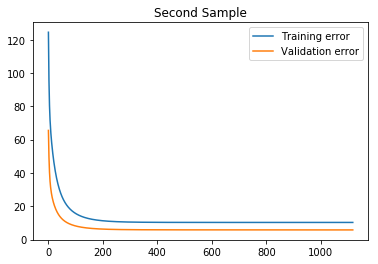

In [37]:
plt.plot([i for i in range(len(train_error3))], train_error3, label='Training error')
plt.plot([i for i in range(len(valid_error3))], valid_error3, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Second Sample')

In [38]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample4)
learning_rate = 0.01
train_error4, valid_error4, theta4 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Iteration:  0
Previous theta :  [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
New theta_0 : [1.43909221 1.30157394 1.5803696  1.27931417 1.44299964 1.30284664
 1.57698581 1.32674913 1.62733447 1.27295383 1.27188538 1.36276908
 1.57455564 1.33341151]
Training Error:  125.9250301096007
Iteration:  1
Previous theta :  [1.43909221 1.30157394 1.5803696  1.27931417 1.44299964 1.30284664
 1.57698581 1.32674913 1.62733447 1.27295383 1.27188538 1.36276908
 1.57455564 1.33341151]
New theta_0 : [1.38146456 1.14126159 1.62989009 1.10790993 1.38785484 1.15105545
 1.62979965 1.1930882  1.71735221 1.08962111 1.08814105 1.25120538
 1.62278174 1.20332276]
Training Error:  107.94307821087563
Iteration:  2
Previous theta :  [1.38146456 1.14126159 1.62989009 1.10790993 1.38785484 1.15105545
 1.62979965 1.1930882  1.71735221 1.08962111 1.08814105 1.25120538
 1.62278174 1.20332276]
New theta_0 : [1.32678642 1.01071364 1.65601592 0.97455115 1.33459171 1.03423061
 1.66420228 1.08986746 1.77877264 

Training Error:  32.6997878275548
Iteration:  37
Previous theta :  [ 0.37022396  0.10423481  0.73890936  0.38351445  0.35906778  0.59610565
  1.25117931  0.58697663  1.23321757 -0.04372997 -0.07562527  0.35086928
  0.87355539  0.46759391]
New theta_0 : [ 0.35723019  0.09750085  0.71918982  0.37926627  0.34612917  0.59286633
  1.23990779  0.57995658  1.21592457 -0.04915907 -0.08320013  0.34008852
  0.85456419  0.45778294]
Training Error:  32.1152878389601
Iteration:  38
Previous theta :  [ 0.35723019  0.09750085  0.71918982  0.37926627  0.34612917  0.59286633
  1.23990779  0.57995658  1.21592457 -0.04915907 -0.08320013  0.34008852
  0.85456419  0.45778294]
New theta_0 : [ 0.34473083  0.09108356  0.70002999  0.37505759  0.33371483  0.58956524
  1.22885904  0.57292026  1.19895488 -0.05421046 -0.09042144  0.32956832
  0.83605834  0.4480272 ]
Training Error:  31.551494324803134
Iteration:  39
Previous theta :  [ 0.34473083  0.09108356  0.70002999  0.37505759  0.33371483  0.58956524
  1.2288

Training Error:  18.427111122045176
Iteration:  83
Previous theta :  [ 0.08273564 -0.02263152  0.2161962   0.22808013  0.0893487   0.41856224
  0.88089495  0.29886241  0.6696847  -0.08035583 -0.2113368   0.04010531
  0.36183186  0.09760495]
New theta_0 : [ 0.08040622 -0.02334084  0.21041024  0.2255362   0.08751369  0.41461876
  0.87507559  0.29397287  0.6610115  -0.07889021 -0.21174224  0.03611895
  0.35624425  0.09153962]
Training Error:  18.275519537200093
Iteration:  84
Previous theta :  [ 0.08040622 -0.02334084  0.21041024  0.2255362   0.08751369  0.41461876
  0.87507559  0.29397287  0.6610115  -0.07889021 -0.21174224  0.03611895
  0.35624425  0.09153962]
New theta_0 : [ 0.07815809 -0.02401651  0.20476937  0.22302274  0.08575844  0.41068648
  0.86932325  0.28914838  0.65244073 -0.07739368 -0.2121001   0.03220648
  0.35080217  0.08555227]
Training Error:  18.127443400694247
Iteration:  85
Previous theta :  [ 0.07815809 -0.02401651  0.20476937  0.22302274  0.08575844  0.41068648
  0.

New theta_0 : [ 0.02531563 -0.03813596  0.04968685  0.13039742  0.05315941  0.23702397
  0.65433972  0.12215531  0.32737443  0.00687818 -0.20017962 -0.09624449
  0.20061364 -0.12842788]
Training Error:  13.684765081372085
Iteration:  134
Previous theta :  [ 0.02531563 -0.03813596  0.04968685  0.13039742  0.05315941  0.23702397
  0.65433972  0.12215531  0.32737443  0.00687818 -0.20017962 -0.09624449
  0.20061364 -0.12842788]
New theta_0 : [ 0.02487101 -0.03828881  0.04817912  0.12901038  0.0530342   0.23391275
  0.65107331  0.11991871  0.32222848  0.00851879 -0.19969458 -0.0979641
  0.19903812 -0.13148564]
Training Error:  13.631698347311087
Iteration:  135
Previous theta :  [ 0.02487101 -0.03828881  0.04817912  0.12901038  0.0530342   0.23391275
  0.65107331  0.11991871  0.32222848  0.00851879 -0.19969458 -0.0979641
  0.19903812 -0.13148564]
New theta_0 : [ 0.02443893 -0.03844128  0.04671447  0.12763942  0.0529179   0.23081905
  0.64784367  0.11771913  0.31712902  0.01015034 -0.1992082

New theta_0 : [ 0.01419985 -0.0446148   0.01516212  0.08575081  0.05230762  0.12568284
  0.54867974  0.05676397  0.15302251  0.0648682  -0.18154047 -0.14895282
  0.1578606  -0.22354773]
Training Error:  12.162601878222286
Iteration:  174
Previous theta :  [ 0.01419985 -0.0446148   0.01516212  0.08575081  0.05230762  0.12568284
  0.54867974  0.05676397  0.15302251  0.0648682  -0.18154047 -0.14895282
  0.1578606  -0.22354773]
New theta_0 : [ 0.01403588 -0.04479394  0.01480198  0.08487801  0.0523434   0.12322552
  0.54660285  0.05564381  0.14937903  0.06611529 -0.18112685 -0.1499298
  0.15717037 -0.22533182]
Training Error:  12.13665505142445
Iteration:  175
Previous theta :  [ 0.01403588 -0.04479394  0.01480198  0.08487801  0.0523434   0.12322552
  0.54660285  0.05564381  0.14937903  0.06611529 -0.18112685 -0.1499298
  0.15717037 -0.22533182]
New theta_0 : [ 0.0138753  -0.04497394  0.01445926  0.08401525  0.05238028  0.12078309
  0.54454926  0.05454347  0.14576557  0.0673529  -0.18071673

Training Error:  11.427896501247973
Iteration:  212
Previous theta :  [ 0.00971073 -0.05185846  0.01091498  0.0587838   0.05401833  0.04214223
  0.48405648  0.02573158  0.03344296  0.10608146 -0.1684133  -0.17822582
  0.13845447 -0.27719199]
New theta_0 : [ 0.00962682 -0.05205592  0.01099696  0.05822378  0.05406509  0.04019854
  0.4826977   0.02517366  0.03076138  0.10701004 -0.16814005 -0.17881464
  0.13808625 -0.27827409]
Training Error:  11.414094997046426
Iteration:  213
Previous theta :  [ 0.00962682 -0.05205592  0.01099696  0.05822378  0.05406509  0.04019854
  0.4826977   0.02517366  0.03076138  0.10701004 -0.16814005 -0.17881464
  0.13808625 -0.27827409]
New theta_0 : [ 0.00954412 -0.05225345  0.0110859   0.05767035  0.05411168  0.03826697
  0.48135381  0.02462618  0.02810087  0.10793146 -0.16787039 -0.17939583
  0.13772341 -0.27934224]
Training Error:  11.400513681210505
Iteration:  214
Previous theta :  [ 0.00954412 -0.05225345  0.0110859   0.05767035  0.05411168  0.03826697
 

Training Error:  10.986625372063072
Iteration:  256
Previous theta :  [ 0.00687494 -0.06038248  0.01915899  0.03955419  0.05583698 -0.03278928
  0.43629818  0.00902985 -0.06683208  0.14094559 -0.15952859 -0.19813299
  0.12619264 -0.31379555]
New theta_0 : [ 0.0068256  -0.0605676   0.01941785  0.03922733  0.05587178 -0.03426097
  0.43545372  0.00879448 -0.06873915  0.1416134  -0.15939432 -0.19846878
  0.12598561 -0.31441256]
Training Error:  10.979679812907007
Iteration:  257
Previous theta :  [ 0.0068256  -0.0605676   0.01941785  0.03922733  0.05587178 -0.03426097
  0.43545372  0.00879448 -0.06873915  0.1416134  -0.15939432 -0.19846878
  0.12598561 -0.31441256]
New theta_0 : [ 0.00677676 -0.06075216  0.01967847  0.03890462  0.05590627 -0.03572329
  0.43461814  0.0085639  -0.07063174  0.14227643 -0.15926272 -0.19880041
  0.12578099 -0.31502188]
Training Error:  10.972838786732272
Iteration:  258
Previous theta :  [ 0.00677676 -0.06075216  0.01967847  0.03890462  0.05590627 -0.03572329
 

New theta_0 : [ 0.00483015 -0.06914704  0.03374059  0.02719138  0.05728428 -0.09804553
  0.40220174  0.00156606 -0.14915101  0.17023124 -0.15561615 -0.2111399
  0.1179457  -0.33759404]
Training Error:  10.733527454187298
Iteration:  308
Previous theta :  [ 0.00483015 -0.06914704  0.03374059  0.02719138  0.05728428 -0.09804553
  0.40220174  0.00156606 -0.14915101  0.17023124 -0.15561615 -0.2111399
  0.1179457  -0.33759404]
New theta_0 : [ 0.00479909 -0.06929677  0.0340243   0.02703069  0.05730563 -0.09909769
  0.40170717  0.00149174 -0.15044094  0.17070196 -0.15559313 -0.21131944
  0.11782658 -0.33791959]
Training Error:  10.730307196502917
Iteration:  309
Previous theta :  [ 0.00479909 -0.06929677  0.0340243   0.02703069  0.05730563 -0.09909769
  0.40170717  0.00149174 -0.15044094  0.17070196 -0.15559313 -0.21131944
  0.11782658 -0.33791959]
New theta_0 : [ 0.00476828 -0.06944577  0.0343076   0.02687238  0.05732678 -0.10014302
  0.40121752  0.00141922 -0.15172133  0.17116974 -0.1555717

  1.13883642e-01 -3.48216505e-01]
New theta_0 : [ 3.71375331e-03 -7.48096072e-02  4.51088461e-02  2.22221101e-02
  5.80150598e-02 -1.36814991e-01  3.85104124e-01 -3.43617322e-04
 -1.95898176e-01  1.87752263e-01 -1.55884493e-01 -2.17175388e-01
  1.13802613e-01 -3.48416857e-01]
Training Error:  10.63110715705993
Iteration:  350
Previous theta :  [ 3.71375331e-03 -7.48096072e-02  4.51088461e-02  2.22221101e-02
  5.80150598e-02 -1.36814991e-01  3.85104124e-01 -3.43617322e-04
 -1.95898176e-01  1.87752263e-01 -1.55884493e-01 -2.17175388e-01
  1.13802613e-01 -3.48416857e-01]
New theta_0 : [ 3.69128666e-03 -7.49292309e-02  4.53621992e-02  2.21419313e-02
  5.80287488e-02 -1.37614087e-01  3.84775829e-01 -3.66220853e-04
 -1.96844633e-01  1.88119782e-01 -1.55917432e-01 -2.17287725e-01
  1.13722315e-01 -3.48614891e-01]
Training Error:  10.629334186710782
Iteration:  351
Previous theta :  [ 3.69128666e-03 -7.49292309e-02  4.53621992e-02  2.21419313e-02
  5.80287488e-02 -1.37614087e-01  3.84775829e-0

Training Error:  10.576297009874798
Iteration:  390
Previous theta :  [ 0.0029327  -0.07909178  0.05448343  0.02003314  0.05845479 -0.16499971
  0.37410414 -0.00078372 -0.2288529   0.20102618 -0.15790814 -0.22086638
  0.11108921 -0.35480216]
New theta_0 : [ 0.00291595 -0.07918638  0.05469733  0.0200014   0.05846325 -0.16561315
  0.3738779  -0.00078565 -0.2295602   0.20132437 -0.15797455 -0.22094077
  0.11103286 -0.3549275 ]
Training Error:  10.575275952602166
Iteration:  391
Previous theta :  [ 0.00291595 -0.07918638  0.05469733  0.0200014   0.05846325 -0.16561315
  0.3738779  -0.00078565 -0.2295602   0.20132437 -0.15797455 -0.22094077
  0.11103286 -0.3549275 ]
New theta_0 : [ 0.00289932 -0.0792804   0.05491022  0.01997061  0.05847159 -0.16622254
  0.37365371 -0.00078727 -0.23026239  0.20162109 -0.1580416  -0.22101442
  0.11097699 -0.35505145]
Training Error:  10.574268680210883
Iteration:  392
Previous theta :  [ 0.00289932 -0.0792804   0.05491022  0.01997061  0.05847159 -0.16622254
 

New theta_0 : [ 0.00228664 -0.08282763  0.06313818  0.01940033  0.058738   -0.18894032
  0.36568644 -0.00064915 -0.25612474  0.21313827 -0.16142698 -0.22359903
  0.10897765 -0.35926715]
Training Error:  10.541596332051563
Iteration:  435
Previous theta :  [ 0.00228664 -0.08282763  0.06313818  0.01940033  0.058738   -0.18894032
  0.36568644 -0.00064915 -0.25612474  0.21313827 -0.16142698 -0.22359903
  0.10897765 -0.35926715]
New theta_0 : [ 0.00227452 -0.08289953  0.06330875  0.01940167  0.0587423  -0.18939515
  0.36553465 -0.00064272 -0.25663604  0.21338022 -0.16151515 -0.22364775
  0.10893933 -0.35934353]
Training Error:  10.541036709401666
Iteration:  436
Previous theta :  [ 0.00227452 -0.08289953  0.06330875  0.01940167  0.0587423  -0.18939515
  0.36553465 -0.00064272 -0.25663604  0.21338022 -0.16151515 -0.22364775
  0.10893933 -0.35934353]
New theta_0 : [ 0.00226249 -0.08297098  0.06347841  0.01940355  0.05874653 -0.18984696
  0.36538417 -0.0006362  -0.25714368  0.21362112 -0.16160

Training Error:  10.523026570842475
Iteration:  478
Previous theta :  [ 1.83618365e-03 -8.55524556e-02  6.97006726e-02  1.98728980e-02
  5.88624018e-02 -2.06002059e-01  3.60198157e-01 -3.21913857e-04
 -2.75115153e-01  2.22670040e-01 -1.65463066e-01 -2.25355097e-01
  1.07589508e-01 -3.61917011e-01]
New theta_0 : [ 1.82726076e-03 -8.56076545e-02  6.98356006e-02  1.98922279e-02
  5.88639926e-02 -2.06343542e-01  3.60092594e-01 -3.13661974e-04
 -2.75491067e-01  2.22872339e-01 -1.65561478e-01 -2.25388850e-01
  1.07562817e-01 -3.61965542e-01]
Training Error:  10.522704590571957
Iteration:  479
Previous theta :  [ 1.82726076e-03 -8.56076545e-02  6.98356006e-02  1.98922279e-02
  5.88639926e-02 -2.06343542e-01  3.60092594e-01 -3.13661974e-04
 -2.75491067e-01  2.22872339e-01 -1.65561478e-01 -2.25388850e-01
  1.07562817e-01 -3.61965542e-01]
New theta_0 : [ 1.81840102e-03 -8.56625164e-02  6.99697788e-02  1.99118621e-02
  5.88655319e-02 -2.06682757e-01  3.59987899e-01 -3.05402594e-04
 -2.75864311e-0

New theta_0 : [ 1.42835005e-03 -8.81404840e-02  7.61018946e-02  2.12872609e-02
  5.88845935e-02 -2.21778542e-01  3.55493109e-01  1.22921503e-04
 -2.92287961e-01  2.32722138e-01 -1.71010831e-01 -2.26867992e-01
  1.06407671e-01 -3.63975808e-01]
Training Error:  10.510087575511301
Iteration:  533
Previous theta :  [ 1.42835005e-03 -8.81404840e-02  7.61018946e-02  2.12872609e-02
  5.88845935e-02 -2.21778542e-01  3.55493109e-01  1.22921503e-04
 -2.92287961e-01  2.32722138e-01 -1.71010831e-01 -2.26867992e-01
  1.06407671e-01 -3.63975808e-01]
New theta_0 : [ 1.42230605e-03 -8.81800424e-02  7.62008281e-02  2.13178995e-02
  5.88839635e-02 -2.22015268e-01  3.55425139e-01  1.30570647e-04
 -2.92542349e-01  2.32886628e-01 -1.71112834e-01 -2.26890072e-01
  1.06390809e-01 -3.64003867e-01]
Training Error:  10.509922721691964
Iteration:  534
Previous theta :  [ 1.42230605e-03 -8.81800424e-02  7.62008281e-02  2.13178995e-02
  5.88839635e-02 -2.22015268e-01  3.55425139e-01  1.30570647e-04
 -2.92542349e-0

New theta_0 : [ 1.24979257e-03 -8.93295772e-02  7.90876261e-02  2.23508577e-02
  5.88493731e-02 -2.28816734e-01  3.53503979e-01  3.63215823e-04
 -2.99802832e-01  2.37855747e-01 -1.74364222e-01 -2.27519002e-01
  1.05919218e-01 -3.64775075e-01]
Training Error:  10.505538315343344
Iteration:  566
Previous theta :  [ 1.24979257e-03 -8.93295772e-02  7.90876261e-02  2.23508577e-02
  5.88493731e-02 -2.28816734e-01  3.53503979e-01  3.63215823e-04
 -2.99802832e-01  2.37855747e-01 -1.74364222e-01 -2.27519002e-01
  1.05919218e-01 -3.64775075e-01]
New theta_0 : [ 0.001245   -0.08936213  0.07916967  0.02238441  0.05884789 -0.22900688
  0.35345113  0.0003701  -0.30000438  0.23800233 -0.17446511 -0.22753646
  0.10590642 -0.36479568]
Training Error:  10.505425334234406
Iteration:  567
Previous theta :  [ 0.001245   -0.08936213  0.07916967  0.02238441  0.05884789 -0.22900688
  0.35345113  0.0003701  -0.30000438  0.23800233 -0.17446511 -0.22753646
  0.10590642 -0.36479568]
New theta_0 : [ 0.00124025 -0.

Iteration:  611
Previous theta :  [ 0.00106441 -0.09062302  0.08235799  0.02389594  0.05876471 -0.23624188
  0.35147231  0.00064982 -0.30760571  0.24398939 -0.17882564 -0.22819845
  0.10543721 -0.36554285]
New theta_0 : [ 0.00106092 -0.09064815  0.08242171  0.02393067  0.05876248 -0.23638313
  0.35143425  0.00065567 -0.30775267  0.24411565 -0.17892257 -0.22821137
  0.10542843 -0.36555675]
Training Error:  10.501427123475592
Iteration:  612
Previous theta :  [ 0.00106092 -0.09064815  0.08242171  0.02393067  0.05876248 -0.23638313
  0.35143425  0.00065567 -0.30775267  0.24411565 -0.17892257 -0.22821137
  0.10542843 -0.36555675]
New theta_0 : [ 0.00105745 -0.09067315  0.08248508  0.02396539  0.05876024 -0.23652345
  0.35139647  0.00066151 -0.30789861  0.2442415  -0.1790194  -0.2282242
  0.10541973 -0.36557054]
Training Error:  10.501358116399683
Iteration:  613
Previous theta :  [ 0.00105745 -0.09067315  0.08248508  0.02396539  0.05876024 -0.23652345
  0.35139647  0.00066151 -0.30789861  

New theta_0 : [ 0.00093433 -0.09158684  0.08480378  0.02537882  0.05865951 -0.24155134
  0.3500544   0.0008842  -0.31308371  0.24907067 -0.1828851  -0.22868572
  0.10511939 -0.36604993]
Training Error:  10.499049000175841
Iteration:  654
Previous theta :  [ 0.00093433 -0.09158684  0.08480378  0.02537882  0.05865951 -0.24155134
  0.3500544   0.0008842  -0.31308371  0.24907067 -0.1828851  -0.22868572
  0.10511939 -0.36604993]
New theta_0 : [ 0.00093175 -0.09160665  0.08485409  0.02541283  0.05865688 -0.24165791
  0.35002616  0.00088925 -0.3131926   0.24918085 -0.18297666 -0.22869556
  0.10511329 -0.36605981]
Training Error:  10.499003384956117
Iteration:  655
Previous theta :  [ 0.00093175 -0.09160665  0.08485409  0.02541283  0.05865688 -0.24165791
  0.35002616  0.00088925 -0.3131926   0.24918085 -0.18297666 -0.22869556
  0.10511329 -0.36605981]
New theta_0 : [ 0.00092918 -0.09162636  0.08490413  0.02544681  0.05865424 -0.2417638
  0.34999811  0.00089429 -0.31330073  0.24929068 -0.183068

Training Error:  10.497328826370286
Iteration:  700
Previous theta :  [ 0.00083225 -0.09239699  0.08686029  0.02690457  0.05853353 -0.24580307
  0.34893134  0.00110109 -0.31738693  0.25380404 -0.18694915 -0.22908201
  0.10488659 -0.36643816]
New theta_0 : [ 0.00083037 -0.09241251  0.08689966  0.02693672  0.05853071 -0.24588218
  0.34891047  0.00110548 -0.31746611  0.25389977 -0.18703405 -0.22908948
  0.10488249 -0.3664453 ]
Training Error:  10.497298675612871
Iteration:  701
Previous theta :  [ 0.00083037 -0.09241251  0.08689966  0.02693672  0.05853071 -0.24588218
  0.34891047  0.00110548 -0.31746611  0.25389977 -0.18703405 -0.22908948
  0.10488249 -0.3664453 ]
New theta_0 : [ 0.00082851 -0.09242796  0.08693884  0.02696883  0.05852789 -0.24596078
  0.34888973  0.00110986 -0.31754475  0.2539952  -0.18711879 -0.2290969
  0.10487842 -0.3664524 ]
Training Error:  10.497268781913876
Iteration:  702
Previous theta :  [ 0.00082851 -0.09242796  0.08693884  0.02696883  0.05852789 -0.24596078
  

Training Error:  10.496069604561697
Iteration:  751
Previous theta :  [ 0.00075128 -0.09309584  0.08863085  0.02847893  0.0583885  -0.24925628
  0.34801708  0.00131059 -0.32080459  0.25833943 -0.1910841  -0.22941265
  0.10471712 -0.36675118]
New theta_0 : [ 0.00074996 -0.09310784  0.08866119  0.0285084   0.05838566 -0.24931342
  0.34800185  0.00131443 -0.32086038  0.2584217  -0.19116118 -0.22941822
  0.1047145  -0.36675642]
Training Error:  10.496049691687961
Iteration:  752
Previous theta :  [ 0.00074996 -0.09310784  0.08866119  0.0285084   0.05838566 -0.24931342
  0.34800185  0.00131443 -0.32086038  0.2584217  -0.19116118 -0.22941822
  0.1047145  -0.36675642]
New theta_0 : [ 0.00074865 -0.09311977  0.08869138  0.0285378   0.05838282 -0.24937019
  0.34798671  0.00131826 -0.32091579  0.25850373 -0.19123811 -0.22942376
  0.10471191 -0.36676164]
Training Error:  10.496029931840997
Iteration:  753
Previous theta :  [ 0.00074865 -0.09311977  0.08869138  0.0285378   0.05838282 -0.24937019
 

Training Error:  10.495236094479461
Iteration:  801
Previous theta :  [ 0.00069518 -0.0936299   0.08997947  0.02988258  0.05824834 -0.25171585
  0.34735478  0.00149203 -0.32317695  0.26217299 -0.19475066 -0.22965671
  0.10461158 -0.36698245]
New theta_0 : [ 0.00069424 -0.09363934  0.09000326  0.02990919  0.05824559 -0.25175764
  0.34734337  0.00149546 -0.32321667  0.26224414 -0.19482013 -0.22966095
  0.10460993 -0.36698652]
Training Error:  10.495222320460993
Iteration:  802
Previous theta :  [ 0.00069424 -0.09363934  0.09000326  0.02990919  0.05824559 -0.25175764
  0.34734337  0.00149546 -0.32321667  0.26224414 -0.19482013 -0.22966095
  0.10460993 -0.36698652]
New theta_0 : [ 0.00069331 -0.09364873  0.09002694  0.02993575  0.05824284 -0.25179918
  0.34733202  0.00149888 -0.32325613  0.26231509 -0.19488944 -0.22966516
  0.10460829 -0.36699057]
Training Error:  10.49520864311383
Iteration:  803
Previous theta :  [ 0.00069331 -0.09364873  0.09002694  0.02993575  0.05824284 -0.25179918
  

New theta_0 : [ 0.00065524 -0.09405265  0.09104319  0.03114361  0.05811477 -0.25352096
  0.34685392  0.00165478 -0.32486932  0.26549252 -0.19804319 -0.22984324
  0.10454565 -0.36716543]
Training Error:  10.494651252211938
Iteration:  851
Previous theta :  [ 0.00065524 -0.09405265  0.09104319  0.03114361  0.05811477 -0.25352096
  0.34685392  0.00165478 -0.32486932  0.26549252 -0.19804319 -0.22984324
  0.10454565 -0.36716543]
New theta_0 : [ 0.00065457 -0.09406017  0.09106208  0.0311674   0.05811219 -0.25355175
  0.3468452   0.00165787 -0.32489772  0.26555421 -0.19810535 -0.2298465
  0.10454464 -0.36716872]
Training Error:  10.49464143891674
Iteration:  852
Previous theta :  [ 0.00065457 -0.09406017  0.09106208  0.0311674   0.05811219 -0.25355175
  0.3468452   0.00165787 -0.32489772  0.26555421 -0.19810535 -0.2298465
  0.10454464 -0.36716872]
New theta_0 : [ 0.00065391 -0.09406766  0.09108089  0.03119113  0.0581096  -0.25358236
  0.34683652  0.00166095 -0.32492593  0.26561572 -0.19816737

  0.1045102  -0.36729622]
New theta_0 : [ 0.00062964 -0.09435448  0.09180025  0.03213909  0.05800473 -0.25471611
  0.34650924  0.00178495 -0.3259568   0.2680483  -0.20064709 -0.22997196
  0.10450955 -0.36729903]
Training Error:  10.494273916942758
Iteration:  895
Previous theta :  [ 0.00062964 -0.09435448  0.09180025  0.03213909  0.05800473 -0.25471611
  0.34650924  0.00178495 -0.3259568   0.2680483  -0.20064709 -0.22997196
  0.10450955 -0.36729903]
New theta_0 : [ 0.00062914 -0.09436069  0.09181583  0.03216052  0.05800232 -0.25473982
  0.34650225  0.00178778 -0.32597803  0.26810278 -0.20070322 -0.22997456
  0.10450891 -0.36730183]
Training Error:  10.494266500739954
Iteration:  896
Previous theta :  [ 0.00062914 -0.09436069  0.09181583  0.03216052  0.05800232 -0.25473982
  0.34650225  0.00178778 -0.32597803  0.26810278 -0.20070322 -0.22997456
  0.10450891 -0.36730183]
New theta_0 : [ 0.00062865 -0.09436689  0.09183134  0.0321819   0.05799991 -0.25476339
  0.3464953   0.00179061 -0.325

New theta_0 : [ 0.0006144  -0.09455204  0.0922947   0.03283915  0.05792511 -0.25544951
  0.34628943  0.00187807 -0.32660608  0.26981763 -0.20248249 -0.23005382
  0.1044914  -0.36738918]
Training Error:  10.494045654534993
Iteration:  929
Previous theta :  [ 0.0006144  -0.09455204  0.0922947   0.03283915  0.05792511 -0.25544951
  0.34628943  0.00187807 -0.32660608  0.26981763 -0.20248249 -0.23005382
  0.1044914  -0.36738918]
New theta_0 : [ 0.000614   -0.09455745  0.09230821  0.03285886  0.05792284 -0.25546897
  0.34628349  0.00188071 -0.32662308  0.26986716 -0.20253425 -0.23005602
  0.10449097 -0.36739168]
Training Error:  10.49403962908204
Iteration:  930
Previous theta :  [ 0.000614   -0.09455745  0.09230821  0.03285886  0.05792284 -0.25546897
  0.34628349  0.00188071 -0.32662308  0.26986716 -0.20253425 -0.23005602
  0.10449097 -0.36739168]
New theta_0 : [ 0.0006136  -0.09456283  0.09232166  0.03287853  0.05792058 -0.25548833
  0.34627757  0.00188335 -0.32663997  0.26991655 -0.202585

New theta_0 : [ 0.00059969 -0.09476124  0.09281735  0.03362626  0.05783353 -0.25617896
  0.34606159  0.00198478 -0.32723369  0.27178364 -0.20455138 -0.23013813
  0.10447729 -0.36748809]
Training Error:  10.493821076981028
Iteration:  971
Previous theta :  [ 0.00059969 -0.09476124  0.09281735  0.03362626  0.05783353 -0.25617896
  0.34606159  0.00198478 -0.32723369  0.27178364 -0.20455138 -0.23013813
  0.10447729 -0.36748809]
New theta_0 : [ 0.00059939 -0.09476581  0.09282875  0.03364401  0.05783145 -0.25619432
  0.34605667  0.00198721 -0.32724667  0.27182771 -0.20459809 -0.23013994
  0.10447704 -0.3674903 ]
Training Error:  10.493816378292962
Iteration:  972
Previous theta :  [ 0.00059939 -0.09476581  0.09282875  0.03364401  0.05783145 -0.25619432
  0.34605667  0.00198721 -0.32724667  0.27182771 -0.20459809 -0.23013994
  0.10447704 -0.3674903 ]
New theta_0 : [ 0.00059909 -0.09477036  0.09284011  0.03366171  0.05782936 -0.25620959
  0.34605177  0.00198964 -0.32725956  0.27187165 -0.20464

Training Error:  10.493620018754088
Iteration:  1020
Previous theta :  [ 0.00058689 -0.0949657   0.09332738  0.03444474  0.05773616 -0.25684065
  0.34584358  0.00209842 -0.32778226  0.2738056  -0.20670936 -0.23021789
  0.10446886 -0.36758937]
New theta_0 : [ 0.00058666 -0.0949695   0.09333683  0.0344604   0.05773427 -0.25685241
  0.34583958  0.00210062 -0.32779179  0.27384408 -0.20675071 -0.23021934
  0.10446876 -0.3675913 ]
Training Error:  10.493616475461634
Iteration:  1021
Previous theta :  [ 0.00058666 -0.0949695   0.09333683  0.0344604   0.05773427 -0.25685241
  0.34583958  0.00210062 -0.32779179  0.27384408 -0.20675071 -0.23021934
  0.10446876 -0.3675913 ]
New theta_0 : [ 0.00058644 -0.09497327  0.09334625  0.03447601  0.05773239 -0.25686411
  0.3458356   0.00210282 -0.32780127  0.27388246 -0.20679195 -0.23022078
  0.10446866 -0.36759322]
Training Error:  10.493612952275384
Iteration:  1022
Previous theta :  [ 0.00058644 -0.09497327  0.09334625  0.03447601  0.05773239 -0.2568641

Iteration:  1067
Previous theta :  [ 0.00057782 -0.09512963  0.0937359   0.03513848  0.05765202 -0.25733167
  0.34567192  0.00219715 -0.32817233  0.2755042  -0.20854416 -0.23027973
  0.10446612 -0.36767475]
New theta_0 : [ 0.00057765 -0.09513283  0.09374385  0.03515233  0.05765033 -0.25734087
  0.3456686   0.00219915 -0.32817948  0.27553801 -0.20858087 -0.23028092
  0.1044661  -0.36767645]
Training Error:  10.4934706572322
Iteration:  1068
Previous theta :  [ 0.00057765 -0.09513283  0.09374385  0.03515233  0.05765033 -0.25734087
  0.3456686   0.00219915 -0.32817948  0.27553801 -0.20858087 -0.23028092
  0.1044661  -0.36767645]
New theta_0 : [ 0.00057749 -0.09513601  0.09375178  0.03516616  0.05764864 -0.25735003
  0.34566529  0.00220114 -0.32818657  0.27557172 -0.20861748 -0.2302821
  0.10446609 -0.36767815]
Training Error:  10.49346795440205
Iteration:  1069
Previous theta :  [ 0.00057749 -0.09513601  0.09375178  0.03516616  0.05764864 -0.25735003
  0.34566529  0.00220114 -0.32818657  

Training Error:  10.493352380135889
Iteration:  1118
Previous theta :  [ 0.00057054 -0.09527898  0.09410789  0.035801    0.05757041 -0.25774664
  0.34551772  0.00229368 -0.32848704  0.27711528 -0.21030147 -0.2303343
  0.10446682 -0.36775644]
New theta_0 : [ 0.00057042 -0.09528165  0.09411454  0.03581312  0.05756891 -0.25775378
  0.34551498  0.00229546 -0.32849231  0.27714468 -0.21033368 -0.23033526
  0.10446686 -0.36775794]
Training Error:  10.493350333355002
Iteration:  1119
Previous theta :  [ 0.00057042 -0.09528165  0.09411454  0.03581312  0.05756891 -0.25775378
  0.34551498  0.00229546 -0.32849231  0.27714468 -0.21033368 -0.23033526
  0.10446686 -0.36775794]
New theta_0 : [ 0.0005703  -0.09528431  0.09412117  0.03582522  0.05756741 -0.25776088
  0.34551225  0.00229725 -0.32849754  0.27717399 -0.2103658  -0.23033622
  0.1044669  -0.36775943]
Training Error:  10.493348297860122
Iteration:  1120
Previous theta :  [ 0.0005703  -0.09528431  0.09412117  0.03582522  0.05756741 -0.25776088

Iteration:  1159
Previous theta :  [ 0.0005661  -0.09538142  0.09436305  0.03627277  0.0575116  -0.25801286
  0.34541303  0.0023638  -0.3286798   0.27825677 -0.21155586 -0.23037071
  0.10446907 -0.36781493]
New theta_0 : [ 0.00056601 -0.09538375  0.09436884  0.03628365  0.05751024 -0.25801873
  0.34541066  0.00236543 -0.32868395  0.27828304 -0.21158482 -0.23037152
  0.10446914 -0.36781628]
Training Error:  10.493275435721122
Iteration:  1160
Previous theta :  [ 0.00056601 -0.09538375  0.09436884  0.03628365  0.05751024 -0.25801873
  0.34541066  0.00236543 -0.32868395  0.27828304 -0.21158482 -0.23037152
  0.10446914 -0.36781628]
New theta_0 : [ 0.00056591 -0.09538607  0.09437462  0.03629451  0.05750888 -0.25802458
  0.3454083   0.00236706 -0.32868809  0.27830924 -0.2116137  -0.23037234
  0.10446921 -0.36781763]
Training Error:  10.493273811784766
Iteration:  1161
Previous theta :  [ 0.00056591 -0.09538607  0.09437462  0.03629451  0.05750888 -0.25802458
  0.3454083   0.00236706 -0.328688

Iteration:  1199
Previous theta :  [ 0.00056268 -0.09546876  0.09458062  0.03668624  0.05745962 -0.25822782
  0.34532438  0.00242624 -0.32882908  0.2792537  -0.21265724 -0.23040106
  0.10447213 -0.36786653]
New theta_0 : [ 0.00056261 -0.0954708   0.09458571  0.03669602  0.05745838 -0.25823271
  0.34532232  0.00242772 -0.3288324   0.27927726 -0.21268333 -0.23040176
  0.10447221 -0.36786775]
Training Error:  10.493216948368369
Iteration:  1200
Previous theta :  [ 0.00056261 -0.0954708   0.09458571  0.03669602  0.05745838 -0.25823271
  0.34532232  0.00242772 -0.3288324   0.27927726 -0.21268333 -0.23040176
  0.10447221 -0.36786775]
New theta_0 : [ 0.00056253 -0.09547283  0.09459078  0.03670578  0.05745715 -0.25823757
  0.34532026  0.00242921 -0.32883571  0.27930075 -0.21270934 -0.23040246
  0.10447229 -0.36786898]
Training Error:  10.493215644025046
Iteration:  1201
Previous theta :  [ 0.00056253 -0.09547283  0.09459078  0.03670578  0.05745715 -0.25823757
  0.34532026  0.00242921 -0.328835

Text(0.5,1,'Second Sample')

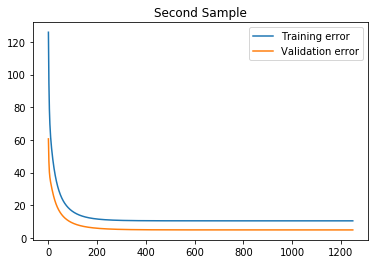

In [39]:
plt.plot([i for i in range(len(train_error4))], train_error4, label='Training error')
plt.plot([i for i in range(len(valid_error4))], valid_error4, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Second Sample')

In [40]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample5)
learning_rate = 0.01
train_error5, valid_error5, theta5 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Iteration:  0
Previous theta :  [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
New theta_0 : [1.44564035 1.31856136 1.5712472  1.31763039 1.4509704  1.32558694
 1.57141313 1.35409016 1.61260055 1.31038829 1.30765618 1.3865367
 1.54607914 1.35716799]
Training Error:  119.75763959649055
Iteration:  1
Previous theta :  [1.44564035 1.31856136 1.5712472  1.31763039 1.4509704  1.32558694
 1.57141313 1.35409016 1.61260055 1.31038829 1.30765618 1.3865367
 1.54607914 1.35716799]
New theta_0 : [1.39372128 1.16652537 1.61851527 1.17008711 1.405744   1.18477847
 1.62430003 1.23638997 1.69640534 1.1518735  1.14675671 1.29152693
 1.57769554 1.24015024]
Training Error:  104.88188603426232
Iteration:  2
Previous theta :  [1.39372128 1.16652537 1.61851527 1.17008711 1.405744   1.18477847
 1.62430003 1.23638997 1.69640534 1.1518735  1.14675671 1.29152693
 1.57769554 1.24015024]
New theta_0 : [1.34404669 1.0384766  1.64676802 1.05062067 1.36369875 1.07105128
 1.66235494 1.14135478 1.75716122 1

Training Error:  28.664816315600397
Iteration:  49
Previous theta :  [ 0.26971025  0.01325689  0.59101198  0.4124333   0.42206928  0.49009964
  1.17474597  0.52540111  1.07561965  0.00210039 -0.11211222  0.36321607
  0.80388334  0.33316054]
New theta_0 : [ 2.60582152e-01  9.60122594e-03  5.76543844e-01  4.08964231e-01
  4.11597134e-01  4.86837650e-01  1.16449995e+00  5.18855173e-01
  1.06123164e+00 -4.90019999e-04 -1.17373491e-01  3.54613235e-01
  7.89693662e-01  3.24221800e-01]
Training Error:  28.25624140960203
Iteration:  50
Previous theta :  [ 2.60582152e-01  9.60122594e-03  5.76543844e-01  4.08964231e-01
  4.11597134e-01  4.86837650e-01  1.16449995e+00  5.18855173e-01
  1.06123164e+00 -4.90019999e-04 -1.17373491e-01  3.54613235e-01
  7.89693662e-01  3.24221800e-01]
New theta_0 : [ 0.25177022  0.00612355  0.56245595  0.40551378  0.40139387  0.48357207
  1.15440996  0.51233407  1.04707772 -0.00288494 -0.12243194  0.34614148
  0.77577309  0.31535532]
Training Error:  27.8585449995899

Iteration:  96
Previous theta :  [ 5.67256229e-02 -5.31223504e-02  1.89186726e-01  2.73688844e-01
  1.38206217e-01  3.41741012e-01  8.16809538e-01  2.68077655e-01
  5.80761915e-01 -2.78024714e-04 -2.25383384e-01  7.12223922e-02
  3.65894442e-01 -5.63489792e-03]
New theta_0 : [ 0.05499387 -0.05342456  0.18468122  0.27129224  0.13529363  0.33880668
  0.81121358  0.26392405  0.57309395  0.00097225 -0.22610486  0.06695748
  0.36038828 -0.01111269]
Training Error:  17.06155508054486
Iteration:  97
Previous theta :  [ 0.05499387 -0.05342456  0.18468122  0.27129224  0.13529363  0.33880668
  0.81121358  0.26392405  0.57309395  0.00097225 -0.22610486  0.06695748
  0.36038828 -0.01111269]
New theta_0 : [ 0.05332233 -0.05371076  0.18028187  0.26891722  0.13246237  0.33588375
  0.80568033  0.25982477  0.56551043  0.00224176 -0.2267908   0.06275453
  0.35499462 -0.01652577]
Training Error:  16.930005657807033
Iteration:  98
Previous theta :  [ 0.05332233 -0.05371076  0.18028187  0.26891722  0.13246

Training Error:  12.983498167697464
Iteration:  145
Previous theta :  [ 0.01563356 -0.05972241  0.05847759  0.17854391  0.06102462  0.21141472
  0.60325838  0.1201433   0.28379041  0.06939286 -0.23507782 -0.07958745
  0.19427221 -0.20868662]
New theta_0 : [ 0.01532389 -0.0598171   0.05715071  0.1770104   0.06034981  0.20903469
  0.59995693  0.11811329  0.27905323  0.07079776 -0.23497173 -0.08169991
  0.19225668 -0.21166834]
Training Error:  12.932551041207843
Iteration:  146
Previous theta :  [ 0.01532389 -0.0598171   0.05715071  0.1770104   0.06034981  0.20903469
  0.59995693  0.11811329  0.27905323  0.07079776 -0.23497173 -0.08169991
  0.19225668 -0.21166834]
New theta_0 : [ 0.01502477 -0.05991294  0.05585993  0.17549071  0.05969642  0.2066654
  0.59668989  0.11611504  0.27435778  0.07219738 -0.23485999 -0.08378302
  0.19028134 -0.21461228]
Training Error:  12.88253978287881
Iteration:  147
Previous theta :  [ 0.01502477 -0.05991294  0.05585993  0.17549071  0.05969642  0.2066654
  0.

New theta_0 : [ 0.00942495 -0.06362716  0.03025769  0.13457486  0.04743125  0.13835978
  0.51058934  0.06777857  0.14706869  0.11248375 -0.22961427 -0.13593958
  0.14501727 -0.2894415 ]
Training Error:  11.706205588209476
Iteration:  178
Previous theta :  [ 0.00942495 -0.06362716  0.03025769  0.13457486  0.04743125  0.13835978
  0.51058934  0.06777857  0.14706869  0.11248375 -0.22961427 -0.13593958
  0.14501727 -0.2894415 ]
New theta_0 : [ 0.00932522 -0.06377244  0.02980216  0.13343526  0.04722566  0.13631621
  0.50824628  0.06659519  0.14348357  0.11367438 -0.22941261 -0.13728187
  0.14396531 -0.29139304]
Training Error:  11.677914662138658
Iteration:  179
Previous theta :  [ 0.00932522 -0.06377244  0.02980216  0.13343526  0.04722566  0.13631621
  0.50824628  0.06659519  0.14348357  0.11367438 -0.22941261 -0.13728187
  0.14396531 -0.29139304]
New theta_0 : [ 0.00922884 -0.06391923  0.02936481  0.13230581  0.0470286   0.13428225
  0.50592724  0.06543172  0.13992728  0.11485796 -0.22921

Training Error:  10.77363821280647
Iteration:  225
Previous theta :  [ 0.00706031 -0.0717566   0.0235124   0.09063587  0.04406392  0.05213497
  0.42270759  0.02954752  0.00556104  0.16104516 -0.22011969 -0.18322761
  0.11172577 -0.35857799]
New theta_0 : [ 0.00704127 -0.07194991  0.02360095  0.0898867   0.04408164  0.0505056
  0.42125523  0.0290377   0.00306625  0.16192321 -0.21993145 -0.18395346
  0.11127725 -0.35963814]
Training Error:  10.76039813542949
Iteration:  226
Previous theta :  [ 0.00704127 -0.07194991  0.02360095  0.0898867   0.04408164  0.0505056
  0.42125523  0.0290377   0.00306625  0.16192321 -0.21993145 -0.18395346
  0.11127725 -0.35963814]
New theta_0 : [ 0.00702296 -0.07214369  0.02369596  0.08914419  0.04410152  0.04888424
  0.41981736  0.02853751  0.00058986  0.16279529 -0.21974417 -0.18467018
  0.11083627 -0.36068456]
Training Error:  10.747358519582974
Iteration:  227
Previous theta :  [ 0.00702296 -0.07214369  0.02369596  0.08914419  0.04410152  0.04888424
  0.4

Training Error:  10.504849004851849
Iteration:  249
Previous theta :  [ 0.00676839 -0.07648829  0.02713675  0.07438158  0.04496641  0.01517256
  0.3915539   0.01967951 -0.04954546  0.18054476 -0.21588423 -0.19836634
  0.10276642 -0.38056202]
New theta_0 : [ 0.00676219 -0.07668778  0.02734317  0.07377721  0.04502065  0.01372628
  0.39040981  0.01936245 -0.05163995  0.18128951 -0.2157212  -0.19890465
  0.10246289 -0.3813366 ]
Training Error:  10.495586479888953
Iteration:  250
Previous theta :  [ 0.00676219 -0.07668778  0.02734317  0.07377721  0.04502065  0.01372628
  0.39040981  0.01936245 -0.05163995  0.18128951 -0.2157212  -0.19890465
  0.10246289 -0.3813366 ]
New theta_0 : [ 0.00675637 -0.07688731  0.02755307  0.07317825  0.04507586  0.01228722
  0.38927693  0.01905188 -0.05371947  0.18202915 -0.21555928 -0.19943642
  0.10216403 -0.38210109]
Training Error:  10.4864573727201
Iteration:  251
Previous theta :  [ 0.00675637 -0.07688731  0.02755307  0.07317825  0.04507586  0.01228722
  0

Iteration:  287
Previous theta :  [ 0.00672935 -0.08398309  0.03672492  0.05484688  0.04747302 -0.0349586
  0.35504631  0.01139663 -0.11957439  0.20553537 -0.21046723 -0.21489237
  0.09388115 -0.40387555]
New theta_0 : [ 0.00673232 -0.08417509  0.0370085   0.05441811  0.04754595 -0.03615123
  0.35425472  0.01126275 -0.12117769  0.2061092  -0.21034576 -0.21523538
  0.09370537 -0.40434469]
Training Error:  10.225517284564049
Iteration:  288
Previous theta :  [ 0.00673232 -0.08417509  0.0370085   0.05441811  0.04754595 -0.03615123
  0.35425472  0.01126275 -0.12117769  0.2061092  -0.21034576 -0.21523538
  0.09370537 -0.40434469]
New theta_0 : [ 0.00673544 -0.08436669  0.03729292  0.05399323  0.04761901 -0.03733776
  0.35347063  0.01113223 -0.12276995  0.20667913 -0.21022532 -0.21557448
  0.09353188 -0.40480762]
Training Error:  10.220158572811306
Iteration:  289
Previous theta :  [ 0.00673544 -0.08436669  0.03729292  0.05399323  0.04761901 -0.03733776
  0.35347063  0.01113223 -0.12276995  

Training Error:  10.034307736503314
Iteration:  336
Previous theta :  [ 0.00699822 -0.09281461  0.05093549  0.03784669  0.05103619 -0.08670503
  0.32381188  0.00787211 -0.18658205  0.22957445 -0.20564295 -0.22791688
  0.08737146 -0.4208398 ]
New theta_0 : [ 0.0070055  -0.0929808   0.05122055  0.03757375  0.051106   -0.08762928
  0.32331028  0.00784774 -0.18773216  0.22998842 -0.20556634 -0.22811758
  0.08727283 -0.42108205]
Training Error:  10.031465141620862
Iteration:  337
Previous theta :  [ 0.0070055  -0.0929808   0.05122055  0.03757375  0.051106   -0.08762928
  0.32331028  0.00784774 -0.18773216  0.22998842 -0.20556634 -0.22811758
  0.08727283 -0.42108205]
New theta_0 : [ 0.00701282 -0.09314638  0.05150506  0.03730336  0.05117562 -0.08854868
  0.32281322  0.0078247  -0.18887462  0.23039972 -0.20549053 -0.2283162
  0.08717522 -0.42132099]
Training Error:  10.028658911003037
Iteration:  338
Previous theta :  [ 0.00701282 -0.09314638  0.05150506  0.03730336  0.05117562 -0.08854868
  

New theta_0 : [ 0.00738862 -0.10022276  0.06403226  0.02709122  0.05419531 -0.12669551
  0.3038264   0.00782862 -0.23487433  0.24704782 -0.20271792 -0.23572789
  0.08351931 -0.42949782]
Training Error:  9.930014822871383
Iteration:  385
Previous theta :  [ 0.00738862 -0.10022276  0.06403226  0.02709122  0.05419531 -0.12669551
  0.3038264   0.00782862 -0.23487433  0.24704782 -0.20271792 -0.23572789
  0.08351931 -0.42949782]
New theta_0 : [ 0.00739696 -0.10035828  0.06427771  0.02691999  0.05425374 -0.12740771
  0.30350167  0.00784474 -0.23570712  0.24735156 -0.20267388 -0.23585207
  0.08345745 -0.42961911]
Training Error:  9.928485324560915
Iteration:  386
Previous theta :  [ 0.00739696 -0.10035828  0.06427771  0.02691999  0.05425374 -0.12740771
  0.30350167  0.00784474 -0.23570712  0.24735156 -0.20267388 -0.23585207
  0.08345745 -0.42961911]
New theta_0 : [ 0.0074053  -0.10049317  0.06452219  0.0267504   0.05431192 -0.12811609
  0.30317975  0.0078613  -0.23653451  0.24765345 -0.2026303

Training Error:  9.892526198617698
Iteration:  414
Previous theta :  [ 0.00762988 -0.10390605  0.07075273  0.02274639  0.055788   -0.14586887
  0.29545401  0.00843475 -0.2569589   0.25515077 -0.20164889 -0.23891273
  0.08192153 -0.43237716]
New theta_0 : [ 0.00763811 -0.10402416  0.07096965  0.02261763  0.05583919 -0.14647794
  0.29520051  0.00845948 -0.25764896  0.2554059  -0.20161917 -0.23900879
  0.08187294 -0.43245565]
Training Error:  9.891457680985727
Iteration:  415
Previous theta :  [ 0.00763811 -0.10402416  0.07096965  0.02261763  0.05583919 -0.14647794
  0.29520051  0.00845948 -0.25764896  0.2554059  -0.20161917 -0.23900879
  0.08187294 -0.43245565]
New theta_0 : [ 0.00764633 -0.10414169  0.07118557  0.02249015  0.05589014 -0.14708372
  0.29494914  0.00848439 -0.25833458  0.25565953 -0.20158988 -0.23910403
  0.08182474 -0.43253293]
Training Error:  9.890402211406604
Iteration:  416
Previous theta :  [ 0.00764633 -0.10414169  0.07118557  0.02249015  0.05589014 -0.14708372
  0.

Training Error:  9.854089807806043
Iteration:  461
Previous theta :  [ 0.00800143 -0.10886269  0.07989855  0.01790912  0.05793918 -0.17119698
  0.28554825  0.00970018 -0.28504263  0.26568096 -0.20067276 -0.2426775
  0.08000085 -0.43498397]
New theta_0 : [ 0.00800891 -0.10895569  0.08007059  0.01782963  0.05797954 -0.17166836
  0.28537613  0.00972781 -0.28555316  0.26587597 -0.20066022 -0.24274353
  0.07996694 -0.43501989]
Training Error:  9.853487213175505
Iteration:  462
Previous theta :  [ 0.00800891 -0.10895569  0.08007059  0.01782963  0.05797954 -0.17166836
  0.28537613  0.00972781 -0.28555316  0.26587597 -0.20066022 -0.24274353
  0.07996694 -0.43501989]
New theta_0 : [ 0.00801636 -0.1090482   0.08024173  0.01775098  0.0580197  -0.17213717
  0.28520539  0.00975541 -0.28606044  0.2660699  -0.20064798 -0.24280907
  0.07993328 -0.43505516]
Training Error:  9.85289186294456
Iteration:  463
Previous theta :  [ 0.00801636 -0.1090482   0.08024173  0.01775098  0.0580197  -0.17213717
  0.28

Iteration:  502
Previous theta :  [ 0.00829003 -0.11229835  0.08624808  0.01526273  0.05942849 -0.18854744
  0.27950392  0.01079293 -0.30352602  0.27286658 -0.20037895 -0.24502981
  0.07879393 -0.43600822]
New theta_0 : [ 0.00829659 -0.11237307  0.08638584  0.01521203  0.05946081 -0.18892354
  0.2793795   0.01081814 -0.30391947  0.27302293 -0.20037681 -0.24507922
  0.0787687  -0.43602368]
Training Error:  9.834110275613767
Iteration:  503
Previous theta :  [ 0.00829659 -0.11237307  0.08638584  0.01521203  0.05946081 -0.18892354
  0.2793795   0.01081814 -0.30391947  0.27302293 -0.20037681 -0.24507922
  0.0787687  -0.43602368]
New theta_0 : [ 0.00830312 -0.11244738  0.08652283  0.01516191  0.05949294 -0.18929758
  0.27925605  0.01084326 -0.30431045  0.27317845 -0.20037488 -0.24512831
  0.07874364 -0.43603877]
Training Error:  9.833746699181988
Iteration:  504
Previous theta :  [ 0.00830312 -0.11244738  0.08652283  0.01516191  0.05949294 -0.18929758
  0.27925605  0.01084326 -0.30431045  0

New theta_0 : [ 0.00860489 -0.11574574  0.09257005  0.01325787  0.06091278 -0.2058671
  0.27406496  0.01200192 -0.3213025   0.28014038 -0.20051708 -0.24725626
  0.07767374 -0.43642499]
Training Error:  9.819936496481207
Iteration:  555
Previous theta :  [ 0.00860489 -0.11574574  0.09257005  0.01325787  0.06091278 -0.2058671
  0.27406496  0.01200192 -0.3213025   0.28014038 -0.20051708 -0.24725626
  0.07767374 -0.43642499]
New theta_0 : [ 0.0086102  -0.1158016   0.09267172  0.01323137  0.06093668 -0.20614733
  0.27398185  0.01202213 -0.32158407  0.28025989 -0.2005239  -0.24729166
  0.07765634 -0.43642677]
Training Error:  9.819740651638837
Iteration:  556
Previous theta :  [ 0.0086102  -0.1158016   0.09267172  0.01323137  0.06093668 -0.20614733
  0.27398185  0.01202213 -0.32158407  0.28025989 -0.2005239  -0.24729166
  0.07765634 -0.43642677]
New theta_0 : [ 0.00861548 -0.11585715  0.09277279  0.01320523  0.06096044 -0.20642599
  0.27389936  0.01204225 -0.32186387  0.28037882 -0.20053085 

New theta_0 : [ 0.00875436 -0.11729371  0.0953742   0.01260268  0.06157228 -0.21362941
  0.27182089  0.01256683 -0.32902444  0.28348558 -0.20077391 -0.24823338
  0.0772008  -0.43641561]
Training Error:  9.814959539162514
Iteration:  585
Previous theta :  [ 0.00875436 -0.11729371  0.0953742   0.01260268  0.06157228 -0.21362941
  0.27182089  0.01256683 -0.32902444  0.28348558 -0.20077391 -0.24823338
  0.0772008  -0.43641561]
New theta_0 : [ 0.008759   -0.11734099  0.09545936  0.01258537  0.06159232 -0.21386641
  0.27175427  0.01258422 -0.32925759  0.28358903 -0.20078417 -0.24826315
  0.07718666 -0.4364134 ]
Training Error:  9.814822038437008
Iteration:  586
Previous theta :  [ 0.008759   -0.11734099  0.09545936  0.01258537  0.06159232 -0.21386641
  0.27175427  0.01258422 -0.32925759  0.28358903 -0.20078417 -0.24826315
  0.07718666 -0.4364134 ]
New theta_0 : [ 0.00876362 -0.11738801  0.09554402  0.01256831  0.06161225 -0.21410209
  0.27168814  0.01260151 -0.32948928  0.283692   -0.2007945

New theta_0 : [ 0.00892787 -0.11903125  0.09848026  0.01208308  0.06230337 -0.22233589
  0.26944857  0.0132088  -0.33747818  0.28735646 -0.20126512 -0.24932908
  0.07669457 -0.43625883]
Training Error:  9.81045654912478
Iteration:  626
Previous theta :  [ 0.00892787 -0.11903125  0.09848026  0.01208308  0.06230337 -0.22233589
  0.26944857  0.0132088  -0.33747818  0.28735646 -0.20126512 -0.24932908
  0.07669457 -0.43625883]
New theta_0 : [ 0.00893169 -0.11906885  0.09854687  0.01207466  0.06231905 -0.22252423
  0.26939896  0.01322274 -0.3376584   0.2874421  -0.20127867 -0.24935289
  0.07668393 -0.43625371]
Training Error:  9.81037141743106
Iteration:  627
Previous theta :  [ 0.00893169 -0.11906885  0.09854687  0.01207466  0.06231905 -0.22252423
  0.26939896  0.01322274 -0.3376584   0.2874421  -0.20127867 -0.24935289
  0.07668393 -0.43625371]
New theta_0 : [ 0.0089355  -0.11910625  0.09861308  0.01206642  0.06233463 -0.22271153
  0.26934971  0.0132366  -0.33783749  0.28752736 -0.20129229 

New theta_0 : [ 0.0090761  -0.12047259  0.10101009  0.01185938  0.06289829 -0.22955062
  0.2676011   0.01374337 -0.34429142  0.29071704 -0.20189705 -0.25024886
  0.07629759 -0.43600927]
Training Error:  9.80755709572482
Iteration:  669
Previous theta :  [ 0.0090761  -0.12047259  0.10101009  0.01185938  0.06289829 -0.22955062
  0.2676011   0.01374337 -0.34429142  0.29071704 -0.20189705 -0.25024886
  0.07629759 -0.43600927]
New theta_0 : [ 0.00907918 -0.12050217  0.10106143  0.01185708  0.06291035 -0.22969851
  0.26756437  0.01375434 -0.34442902  0.29078794 -0.20191275 -0.25026793
  0.07628969 -0.43600299]
Training Error:  9.807505326048124
Iteration:  670
Previous theta :  [ 0.00907918 -0.12050217  0.10106143  0.01185708  0.06291035 -0.22969851
  0.26756437  0.01375434 -0.34442902  0.29078794 -0.20191275 -0.25026793
  0.07628969 -0.43600299]
New theta_0 : [ 0.00908224 -0.12053157  0.10111247  0.01185489  0.06292233 -0.22984557
  0.2675279   0.01376524 -0.34456576  0.29085854 -0.20192849

  0.07596315 -0.4356906 ]
New theta_0 : [ 0.00921434 -0.12178888  0.10326837  0.01186252  0.06342682 -0.2361242
  0.26601408  0.01423092 -0.35031553  0.29397792 -0.20273523 -0.25110947
  0.07595758 -0.43568429]
Training Error:  9.805545203365472
Iteration:  720
Previous theta :  [ 0.00921434 -0.12178888  0.10326837  0.01186252  0.06342682 -0.2361242
  0.26601408  0.01423092 -0.35031553  0.29397792 -0.20273523 -0.25110947
  0.07595758 -0.43568429]
New theta_0 : [ 0.00921669 -0.12181114  0.10330602  0.01186462  0.06343559 -0.23623512
  0.26598811  0.01423915 -0.35041543  0.29403523 -0.20275224 -0.25112427
  0.07595206 -0.43567798]
Training Error:  9.805516258346614
Iteration:  721
Previous theta :  [ 0.00921669 -0.12181114  0.10330602  0.01186462  0.06343559 -0.23623512
  0.26598811  0.01423915 -0.35041543  0.29403523 -0.20275224 -0.25112427
  0.07595206 -0.43567798]
New theta_0 : [ 0.00921904 -0.12183328  0.10334344  0.01186678  0.0634443  -0.23634543
  0.2659623   0.01424734 -0.3505147

Training Error:  9.80460741116024
Iteration:  760
Previous theta :  [ 0.00929936 -0.12258963  0.10460938  0.01198898  0.06373762 -0.240107
  0.26509865  0.01452723 -0.35385999  0.29610014 -0.20342404 -0.25164892
  0.07576415 -0.4354403 ]
New theta_0 : [ 0.00930126 -0.12260747  0.10463891  0.0119931   0.06374442 -0.24019549
  0.26507871  0.01453384 -0.35393768  0.296149   -0.2034414  -0.25166111
  0.07575998 -0.43543446]
Training Error:  9.80458892044887
Iteration:  761
Previous theta :  [ 0.00930126 -0.12260747  0.10463891  0.0119931   0.06374442 -0.24019549
  0.26507871  0.01453384 -0.35393768  0.296149   -0.2034414  -0.25166111
  0.07575998 -0.43543446]
New theta_0 : [ 0.00930315 -0.12262521  0.10466826  0.01199724  0.06375118 -0.24028348
  0.26505891  0.01454041 -0.35401488  0.29619768 -0.20345876 -0.25167325
  0.07575584 -0.43542864]
Training Error:  9.804570633874514
Iteration:  762
Previous theta :  [ 0.00930315 -0.12262521  0.10466826  0.01199724  0.06375118 -0.24028348
  0.2650

Previous theta :  [ 0.00935996 -0.12315906  0.10554352  0.01215261  0.06395135 -0.24292498
  0.26447254  0.01473842 -0.35630801  0.29770302 -0.20403184 -0.25204293
  0.07563446 -0.43524533]
New theta_0 : [ 0.00936153 -0.12317377  0.10556741  0.01215779  0.06395677 -0.24299759
  0.26445664  0.01474389 -0.35637033  0.29774575 -0.20404916 -0.25205325
  0.07563121 -0.43524006]
Training Error:  9.804055086699343
Iteration:  796
Previous theta :  [ 0.00936153 -0.12317377  0.10556741  0.01215779  0.06395677 -0.24299759
  0.26445664  0.01474389 -0.35637033  0.29774575 -0.20404916 -0.25205325
  0.07563121 -0.43524006]
New theta_0 : [ 0.00936308 -0.12318841  0.10559116  0.012163    0.06396215 -0.24306978
  0.26444085  0.01474933 -0.35643226  0.2977883  -0.20406648 -0.25206352
  0.07562798 -0.4352348 ]
Training Error:  9.804042643962578
Iteration:  797
Previous theta :  [ 0.00936308 -0.12318841  0.10559116  0.012163    0.06396215 -0.24306978
  0.26444085  0.01474933 -0.35643226  0.2977883  -0.204

Iteration:  835
Previous theta :  [ 0.00941621 -0.12368932  0.10639542  0.01237461  0.06414273 -0.24553141
  0.26390958  0.01493631 -0.35851784  0.29929328 -0.20471917 -0.2524199
  0.07552105 -0.43504796]
New theta_0 : [ 0.00941747 -0.12370115  0.10641421  0.01238046  0.0641469  -0.24558932
  0.26389725  0.01494075 -0.35856625  0.29933011 -0.20473616 -0.25242844
  0.07551862 -0.43504339]
Training Error:  9.803648865698843
Iteration:  836
Previous theta :  [ 0.00941747 -0.12370115  0.10641421  0.01238046  0.0641469  -0.24558932
  0.26389725  0.01494075 -0.35856625  0.29933011 -0.20473616 -0.25242844
  0.07551862 -0.43504339]
New theta_0 : [ 0.00941871 -0.12371293  0.10643288  0.01238633  0.06415104 -0.24564689
  0.263885    0.01494517 -0.35861434  0.2993668  -0.20475314 -0.25243695
  0.0755162  -0.43503883]
Training Error:  9.803640776723396
Iteration:  837
Previous theta :  [ 0.00941871 -0.12371293  0.10643288  0.01238633  0.06415104 -0.24564689
  0.263885    0.01494517 -0.35861434  0.

Iteration:  875
Previous theta :  [ 0.00946109 -0.1241162   0.10706592  0.01261525  0.06428942 -0.24761009
  0.26347171  0.01509748 -0.36023357  0.30066747 -0.20538863 -0.25273215
  0.07543624 -0.43487849]
New theta_0 : [ 0.00946208 -0.12412574  0.10708072  0.01262138  0.06429261 -0.24765627
  0.2634621   0.01510111 -0.36027113  0.30069938 -0.20540506 -0.25273923
  0.07543443 -0.4348746 ]
Training Error:  9.803383411671938
Iteration:  876
Previous theta :  [ 0.00946208 -0.12412574  0.10708072  0.01262138  0.06429261 -0.24765627
  0.2634621   0.01510111 -0.36027113  0.30069938 -0.20540506 -0.25273923
  0.07543443 -0.4348746 ]
New theta_0 : [ 0.00946307 -0.12413523  0.10709544  0.01262752  0.06429577 -0.24770219
  0.26345254  0.01510473 -0.36030845  0.30073117 -0.20542149 -0.25274628
  0.07543262 -0.43487073]
Training Error:  9.803378090617963
Iteration:  877
Previous theta :  [ 0.00946307 -0.12413523  0.10709544  0.01262752  0.06429577 -0.24770219
  0.26345254  0.01510473 -0.36030845  0

Training Error:  9.80314594773042
Iteration:  935
Previous theta :  [ 0.00951172 -0.12460739  0.10781645  0.01298362  0.0644464  -0.24996656
  0.26298671  0.01528701 -0.36211262  0.30239863 -0.20634383 -0.2531036
  0.07534809 -0.43467319]
New theta_0 : [ 0.00951242 -0.12461433  0.10782686  0.01298969  0.0644485  -0.24999946
  0.26298002  0.01528973 -0.36213824  0.30242458 -0.20635918 -0.25310896
  0.07534693 -0.43467023]
Training Error:  9.803143004356885
Iteration:  936
Previous theta :  [ 0.00951242 -0.12461433  0.10782686  0.01298969  0.0644485  -0.24999946
  0.26298002  0.01528973 -0.36213824  0.30242458 -0.20635918 -0.25310896
  0.07534693 -0.43467023]
New theta_0 : [ 0.00951312 -0.12462123  0.10783721  0.01299577  0.06445058 -0.25003218
  0.26297337  0.01529244 -0.36216369  0.30245045 -0.2063745  -0.25311429
  0.07534579 -0.43466728]
Training Error:  9.803140089519948
Iteration:  937
Previous theta :  [ 0.00951312 -0.12462123  0.10783721  0.01299577  0.06445058 -0.25003218
  0.26

Training Error:  9.803043733892336
Iteration:  977
Previous theta :  [ 0.00953796 -0.12486966  0.10820591  0.01323446  0.06452275 -0.25120026
  0.26273702  0.01539131 -0.36305877  0.3034175  -0.20697053 -0.25330847
  0.07530652 -0.43456018]
New theta_0 : [ 0.0095385  -0.12487524  0.10821409  0.01324031  0.0645243  -0.25122622
  0.26273179  0.01539356 -0.36307833  0.30344008 -0.206985   -0.25331288
  0.07530569 -0.43455776]
Training Error:  9.803041760869485
Iteration:  978
Previous theta :  [ 0.0095385  -0.12487524  0.10821409  0.01324031  0.0645243  -0.25122622
  0.26273179  0.01539356 -0.36307833  0.30344008 -0.206985   -0.25331288
  0.07530569 -0.43455776]
New theta_0 : [ 0.00953905 -0.12488078  0.10822222  0.01324614  0.06452584 -0.25125203
  0.26272659  0.0153958  -0.36309776  0.30346259 -0.20699945 -0.25331727
  0.07530486 -0.43455536]
Training Error:  9.80303980608517
Iteration:  979
Previous theta :  [ 0.00953905 -0.12488078  0.10822222  0.01324614  0.06452584 -0.25125203
  0.2

  0.07527166 -0.43445128]
New theta_0 : [ 0.00956255 -0.12512463  0.10857529  0.01352844  0.06458967 -0.25237365
  0.26250135  0.01549612 -0.36392508  0.30450028 -0.20769401 -0.25351289
  0.07527111 -0.43444942]
Training Error:  9.802961628516643
Iteration:  1029
Previous theta :  [ 0.00956255 -0.12512463  0.10857529  0.01352844  0.06458967 -0.25237365
  0.26250135  0.01549612 -0.36392508  0.30450028 -0.20769401 -0.25351289
  0.07527111 -0.43444942]
New theta_0 : [ 0.00956295 -0.1251289   0.10858139  0.01353388  0.06459072 -0.25239302
  0.26249747  0.01549791 -0.36393904  0.30451939 -0.20770734 -0.25351637
  0.07527057 -0.43444756]
Training Error:  9.802960392353022
Iteration:  1030
Previous theta :  [ 0.00956295 -0.1251289   0.10858139  0.01353388  0.06459072 -0.25239302
  0.26249747  0.01549791 -0.36393904  0.30451939 -0.20770734 -0.25351637
  0.07527057 -0.43444756]
New theta_0 : [ 0.00956335 -0.12513315  0.10858745  0.01353931  0.06459175 -0.25241228
  0.26249361  0.0154997  -0.363

Text(0.5,1,'Second Sample')

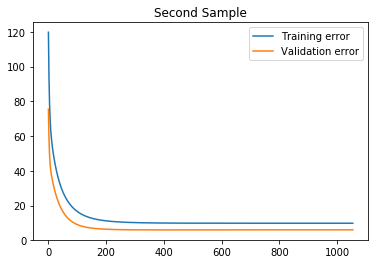

In [41]:
plt.plot([i for i in range(len(train_error5))], train_error5, label='Training error')
plt.plot([i for i in range(len(valid_error5))], valid_error5, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Second Sample')